# Captura de datos

In [33]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/hjmesa/Dengue/master/init.py
from init import init; init(force_download=False)

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


# Captura y desnormalizacion de los datos (si esta es requerida)

In [34]:
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt

#Para regresión lineal
from sklearn import datasets, linear_model

#Para separación de datos en conjuntos de test y entrenamiento
from sklearn.model_selection import train_test_split

#Para regresion polinomial
from sklearn.preprocessing import PolynomialFeatures


#Libreria para regresion con MSV
from sklearn.svm import SVR



# -----------------------------------------------------------------------------
# CAPTURA DE DATOS
# -----------------------------------------------------------------------------    

# Cargar el archivo de datos historicos

#Datos desnormalizados listos para el proceso
#FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_ESTACIONES_NINO.csv'

#Datos historicos normalizados, requieren denormalizacion para transformarlo en los datso 
FILE1 = 'local/data/DATOS_MENSUALES/DATOS_MENSUALES_NORMALIZADOS_CALI.csv'
FILE2 = 'local/data/DATOS_MENSUALES/PROMEDIOS_MENSUALES.CSV'
FILE3 = 'local/data/DATOS_MENSUALES/DESV_ESTA_MENSUALES.CSV'


#Carga del archivo de datos sin normalizar
#dataset = read_csv(FILE1, header=0, index_col=False)

#Carga de los archivos cuando estan normalizados
dataset = read_csv(FILE1, header=0, index_col=False)
media = read_csv(FILE2, header=0, index_col=False)
d_estd = read_csv(FILE3, header=0, index_col=False)

#my_column = dataset.pop("Confirmados")
#dataset.insert(14, my_column.name, my_column)

#Eliminar datos no requeridos
#dataset = dataset.drop(["Todos"], axis=1)

#Capturar los datos normalizados o desnormalizados en una matriz
Datos = dataset.values

#Captura de los parametros de desnormalizacion
v_media = media.values
v_d_estd = d_estd.values

#Creacion de la matriz desnormalizada
Datos_dn = np.zeros((len(Datos), len(Datos[0])))
for i in range (0,len(Datos)):
    Datos_dn[i,0]=Datos[i,0]
    Datos_dn[i,1]=Datos[i,1]
    for j in range (2, len(Datos[0])):
        Datos_dn[i,j]=Datos[i,j]*v_d_estd[int(Datos[i,1]-1),j-1]+v_media[int(Datos[i,1])-1,j-1]
        


Nombres = ['Año','Mes','Precipitación','Humedad relativa media','Humedad relativa máxima','Humedad relativa mínima',
           'Temperatura media','Temperatura máxima','Temperatura mínima','Temperatura Niño 1+2','Anomalia Niño 1+2',
           'Temperatura Niño 3','Anomalia Niño 3','Temperatura Niño 4','Anomalia  Niño 4','Temperatura Niño 3+4',
           'Anomalia Niño 3+4','Casos confirmados por laboratorio','Todos los casos']


#Número de datos
L=len(Datos)

# Función para la captura de datos

In [35]:
def captura(DT):
    # Capturar y estructurar las variables independientes del modelo
    LD=len(DT)
    
    #Precipitación
    XA = DT[:, 3]
    XA = np.reshape(XA, (LD,1))
    
    # Humedad relativa media
    
    XA = DT[:, 3]
    XA = np.reshape(XA, (LD,1))
    # Humedad relativa máxima
    X1 = DT[:, 4]
    X1 = np.reshape(X1, (LD,1))

    XA = np.append(XA, X1, axis=1)

    # Temperatura media
    X1 = DT[:, 6]
    X1 = np.reshape(X1, (LD,1))

    XA = np.append(XA, X1, axis=1)

    # Temperatura máxima
    X1 = DT[:, 7]
    X1 = np.reshape(X1, (LD,1))

    XA = np.append(XA, X1, axis=1)

    # ?????????????????????
    X1 = DT[:, 8]
    X1 = np.reshape(X1, (LD,1))

    XA = np.append(XA, X1, axis=1)

    # 'ANOM.1','NINO4','ANOM.2','NINO3.4','ANOM.3
    X1 = DT[:, 12:17]
    X1 = np.reshape(X1, (LD,5))

    XA = np.append(XA, X1, axis=1)

    #Seleccionar como variable dependiente el numero de casos confirmados
    ya = DT[:, len(DT[0])-2]
    
    return XA,ya



# Funcion para la seleccion de los conjuntos de entrenamiento y evaluación

In [36]:
def seleccion(X,Y,test_size):
    L=len(X)
    EVA = int(L*test_size/100)
    ENT = L - EVA
    X_ENT = np.zeros((ENT,X.shape[1]))
    print(X_ENT)
    #for i in range(0,EVA):
        
    

# Funcion para el trazado de graficos con regresión multiple

In [37]:
def grafico_multiple(Y_pred,texto):
    plt.rcParams['figure.figsize'] = [14.0, 9.0];
    plt.title(texto);
    plt.plot(Y_pred, label='Pronostico', color='red', linewidth=1);
    plt.plot(y_test, label='Datos reales', color='blue', linewidth=1);
    plt.grid();
    plt.legend();
    plt.ylabel('Número de casos');
    plt.xlabel('Número del mes');
    

# (1)---- Regresión lineal simple con datos normalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




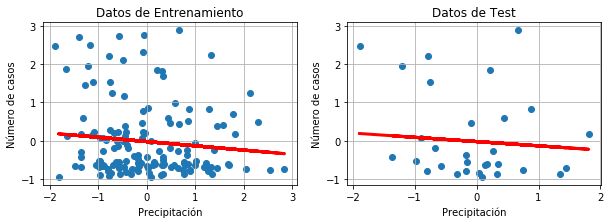

Precisión del modelo: R =  0.014732430946079456



************************Humedad relativa media************************




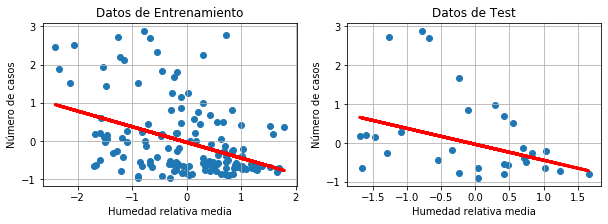

Precisión del modelo: R =  0.18175612339993832



***********************Humedad relativa máxima************************




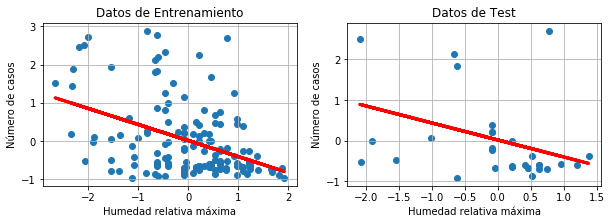

Precisión del modelo: R =  0.18329215890649186



***********************Humedad relativa mínima************************




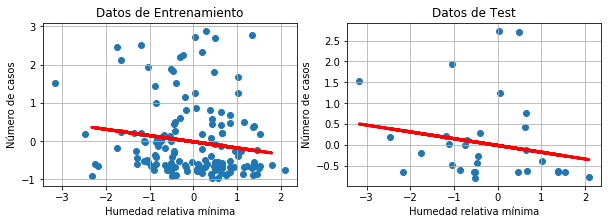

Precisión del modelo: R =  0.022098437168535878



**************************Temperatura media***************************




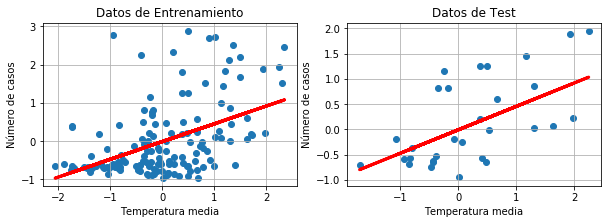

Precisión del modelo: R =  0.1998950339168778



**************************Temperatura máxima**************************




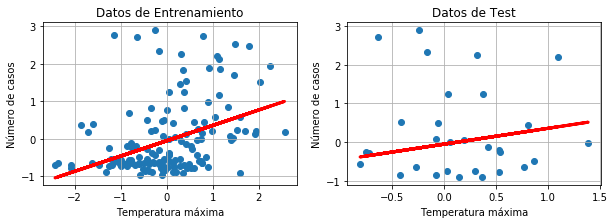

Precisión del modelo: R =  0.22312005046406602



**************************Temperatura mínima**************************




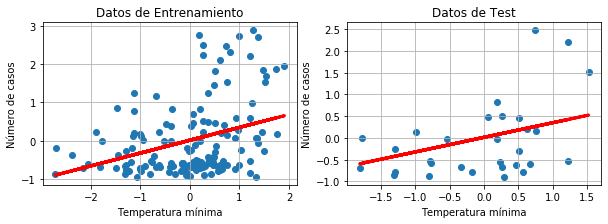

Precisión del modelo: R =  0.11169077998818444



*************************Temperatura niño 1+2*************************




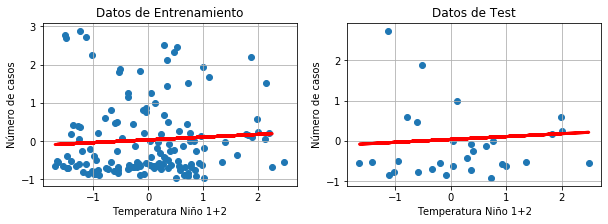

Precisión del modelo: R =  0.004483292268894434



**************************Anomalia niño 1+2***************************




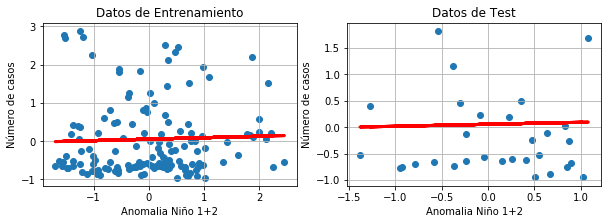

Precisión del modelo: R =  0.0014721736721651224



**************************Temperatura niño 3**************************




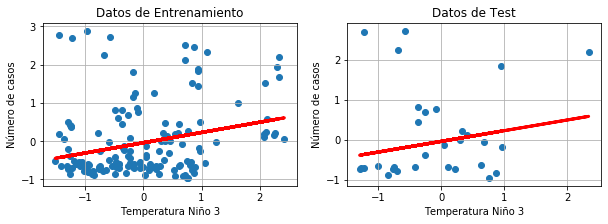

Precisión del modelo: R =  0.08498796595720459



***************************Anomalia niño 3****************************




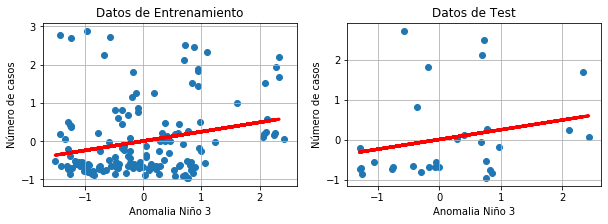

Precisión del modelo: R =  0.06099076035950446



**************************Temperatura niño 4**************************




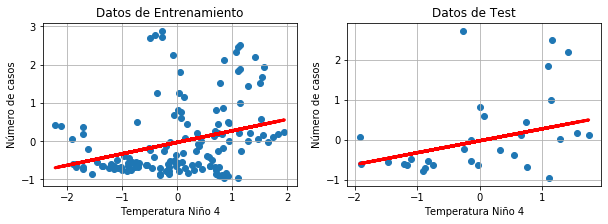

Precisión del modelo: R =  0.08826690762466725



***************************Anomalia  niño 4***************************




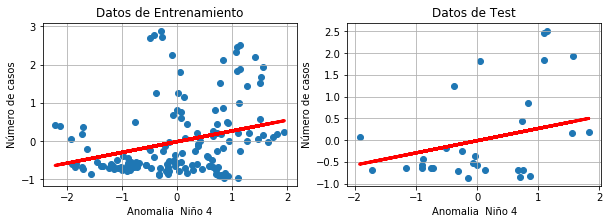

Precisión del modelo: R =  0.08306615918073301



*************************Temperatura niño 3+4*************************




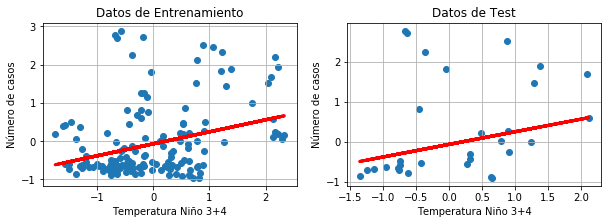

Precisión del modelo: R =  0.11974544334009019



**************************Anomalia niño 3+4***************************




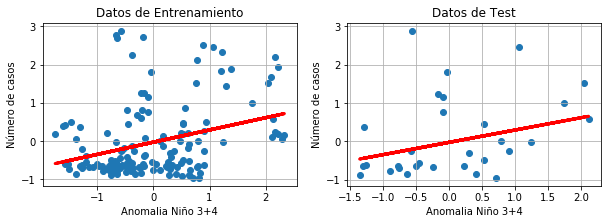

Precisión del modelo: R =  0.10819097442807755





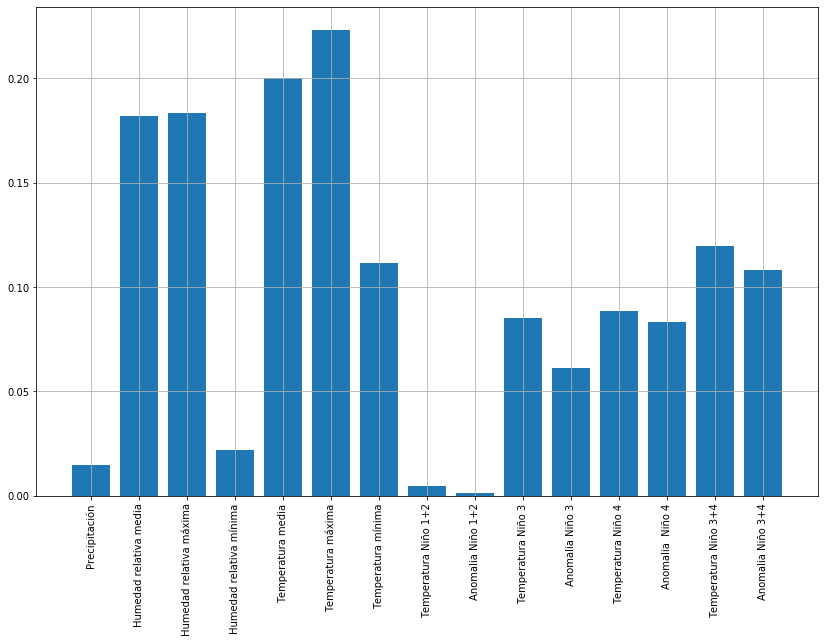

In [38]:
# OK (1)
#Precision en la regresion lineal simple con datos normalizados

#Arreglo para almacenar la correlacion simple de cada variable normalizada
P_R_L_S_N = np.zeros(15)

#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_N[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# (2)---- Regresión lineal simple con datos desnormalizados

=                                      REGRESION LINEL SIMPLE                                      =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




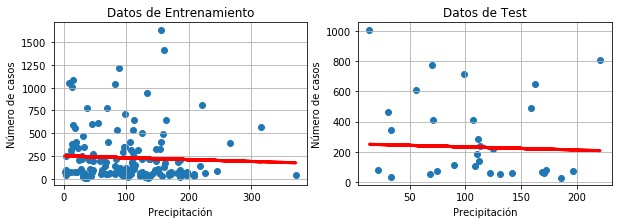

Precisión del modelo: R =  0.0022745612311668717



************************Humedad relativa media************************




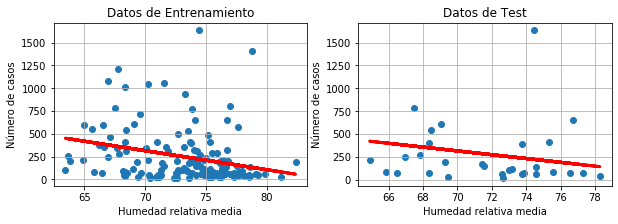

Precisión del modelo: R =  0.08573260848605868



***********************Humedad relativa máxima************************




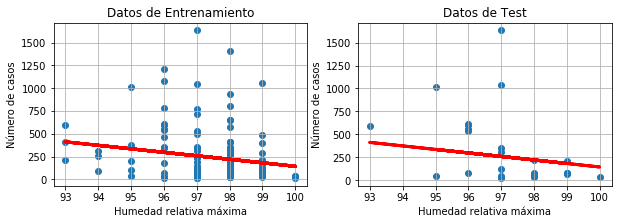

Precisión del modelo: R =  0.04018867143214022



***********************Humedad relativa mínima************************




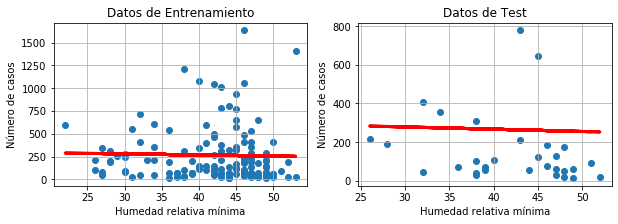

Precisión del modelo: R =  0.0006232137050304898



**************************Temperatura media***************************




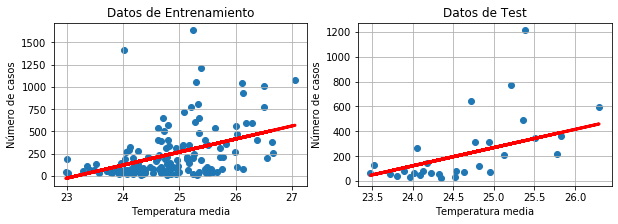

Precisión del modelo: R =  0.17010466408857616



**************************Temperatura máxima**************************




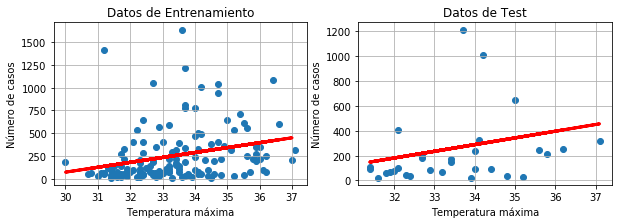

Precisión del modelo: R =  0.07403316209962374



**************************Temperatura mínima**************************




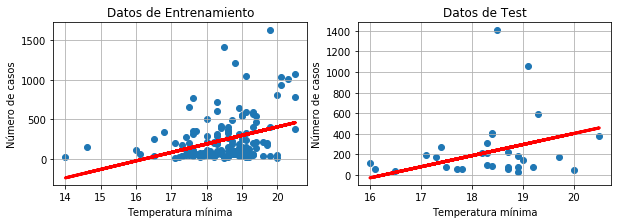

Precisión del modelo: R =  0.12892613783295648



*************************Temperatura niño 1+2*************************




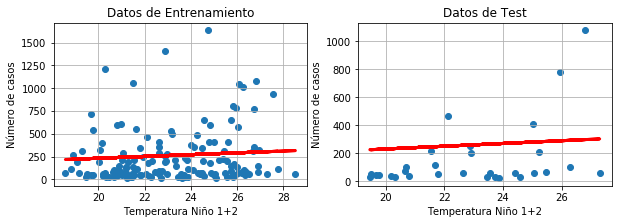

Precisión del modelo: R =  0.005995068889977584



**************************Anomalia niño 1+2***************************




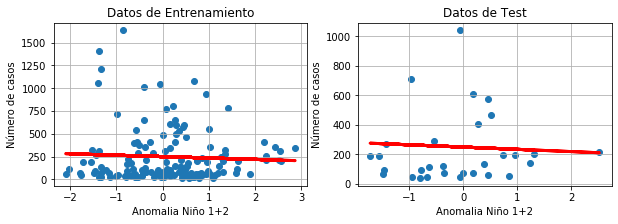

Precisión del modelo: R =  0.002639746950305777



**************************Temperatura niño 3**************************




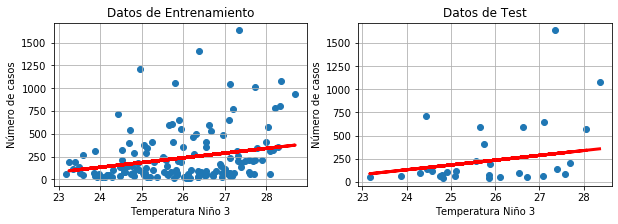

Precisión del modelo: R =  0.06358720389163142



***************************Anomalia niño 3****************************




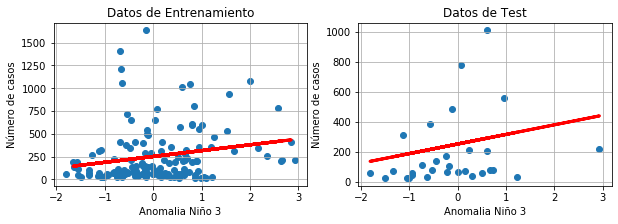

Precisión del modelo: R =  0.039458519771984224



**************************Temperatura niño 4**************************




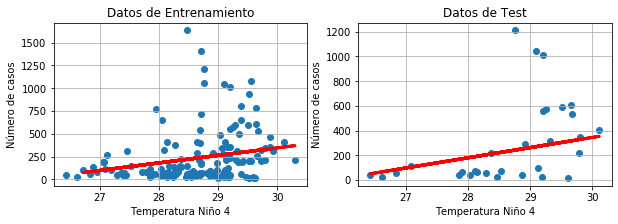

Precisión del modelo: R =  0.05095270869604773



***************************Anomalia  niño 4***************************




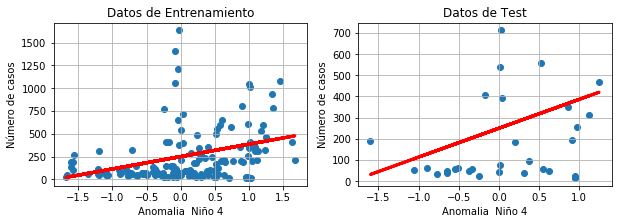

Precisión del modelo: R =  0.11564325853715618



*************************Temperatura niño 3+4*************************




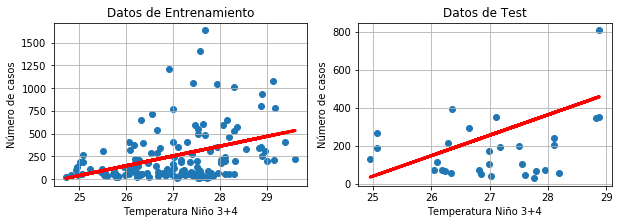

Precisión del modelo: R =  0.13516311054371233



**************************Anomalia niño 3+4***************************




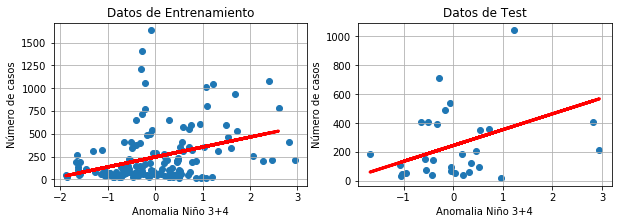

Precisión del modelo: R =  0.11392659637329117





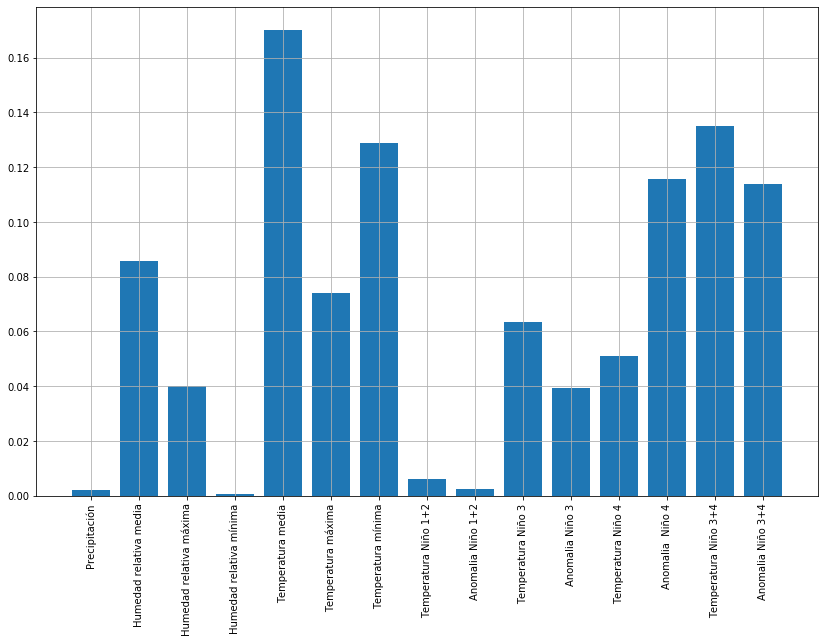

In [39]:
# OK (2)
#Precision en la regresion lineal simple con datos desnormalizados

#Arreglo para almacenar la correlacion simple de cada variable desnormalizada
P_R_L_S_DN = np.zeros(15)


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                      REGRESION LINEL SIMPLE                                      "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Seleccionar como variable dependiente el numero de casos confirmados
y = Datos_dn[:, len(Datos_dn[0])-2]

for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Defino el algoritmo a utilizar
    lr = linear_model.LinearRegression()

    #Entreno el modelo
    lr.fit(X_train, y_train)

    #Realizo una predicción para datos de entrenamientos
    Y_pred = lr.predict(X_train)

    
    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = lr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_L_S_DN[i-2]=lr.score(X_train, y_train)
    print('Precisión del modelo: R = ',P_R_L_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_L_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()




# (3)---- Regresión lineal Múltiple con datos normalizados

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




[[-0.89103331 -1.12876312  0.68691182 ...  0.84933826  0.71032763
   0.7097925 ]
 [-0.01202763  0.08459099  0.11493844 ...  0.8716778   0.82745266
   0.82865968]
 [-0.19698144  0.52623481  0.66470668 ...  0.70677543  0.65218651
   0.65218651]
 ...
 [ 0.72945307 -0.08062594 -0.27772013 ...  0.79955739  0.64248409
   0.64194469]
 [-0.89236339 -0.46525043  0.50523232 ...  0.92018726  0.65576054
   0.65683635]
 [-0.4500837  -0.61394061  0.31996858 ...  0.77541637  0.51009001
   0.51009001]]
(108, 10)
(27, 10)
[[-0.89103331 -1.12876312  0.68691182 ...  0.84933826  0.71032763
   0.7097925 ]
 [-0.01202763  0.08459099  0.11493844 ...  0.8716778   0.82745266
   0.82865968]
 [-0.19698144  0.526

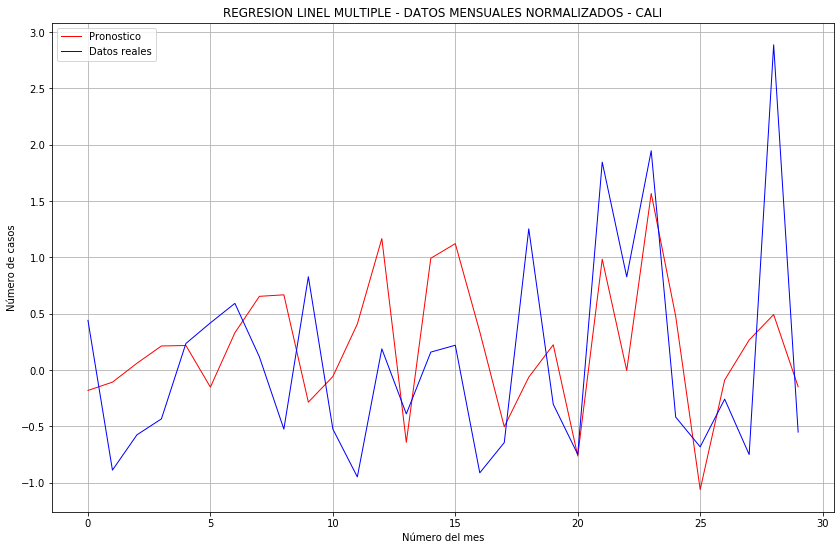

In [44]:
# OK (3)
#Precision en la regresion lineal multiple con datos normalizados
P_R_L_M_N = 0

#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos)
print(X)
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#seleccion(XC,y,0.2)
test_size=0.2
XC=X
YC=y
#--------------------------------------------------------------------

L=len(XC)
PRO = 12
L=L-PRO
EVA = int(L*test_size)
ENT = L - EVA
X_ENT = np.zeros((ENT,X.shape[1]))
X_EVA = np.zeros((EVA,X.shape[1]))
Y_ENT = np.zeros((ENT,1))
Y_EVA = np.zeros((EVA,1))
print(X_ENT.shape)
print(X_EVA.shape)
for i in range(0,ENT):
    for j in range(0,X.shape[1]):
        X_ENT[i,j]=XC[i,j]
    Y_ENT[i]=YC[i]

print(X_ENT)
print(Y_ENT)        



#---------------------------------------------------------------------
#print (len(X_train),X_train,'\n\n\n')
#print (len(X_test),X_test,'\n\n\n')
#print (len(y_train),y_train,'\n\n\n')
#print (len(y_test),y_test,'\n\n\n')



#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_N = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_N)

grafico_multiple(Y_pred_multiple,'REGRESION LINEL MULTIPLE - DATOS MENSUALES NORMALIZADOS - CALI')


# (4)---- Regresión lineal Múltiple con datos desnormalizados

=                                     REGRESION LINEL MULTIPLE                                     =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




Precisión del modelo:
0.321419504378881


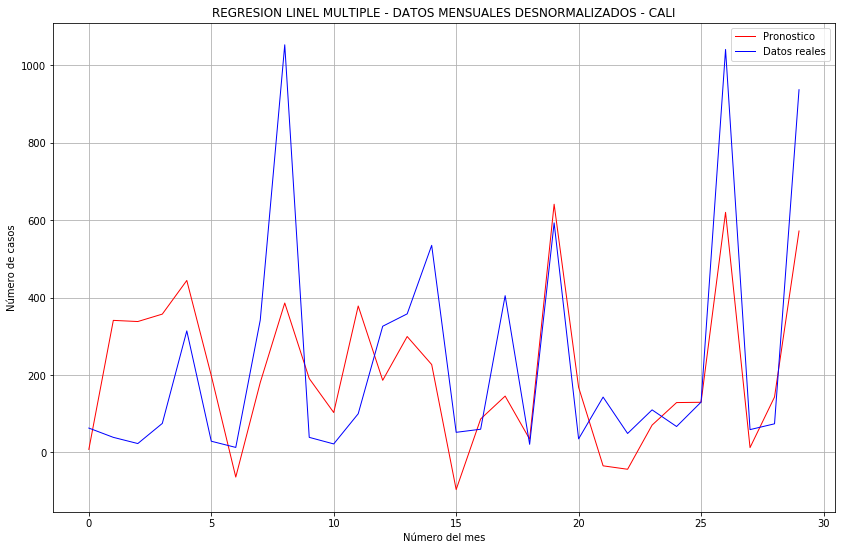

In [9]:
# OK (4)

#Precision en la regresion lineal multiple con datos desnormalizados
P_R_L_M_DN = 0


#Encabezado
cadena = ""
print (cadena.center(100, "="))
cadena = "                                     REGRESION LINEL MULTIPLE                                     "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos_dn)



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Entreno el modelo
lr_multiple.fit(X_train, y_train)

#Realizo una predicción para datos de entrenamientos
Y_pred_multiple = lr_multiple.predict(X_test)


P_R_L_M_DN = lr_multiple.score(X_train, y_train)
print('Precisión del modelo:')
print(P_R_L_M_DN)


grafico_multiple(Y_pred_multiple,'REGRESION LINEL MULTIPLE - DATOS MENSUALES DESNORMALIZADOS - CALI')



# (5)---- Regresión polinomial simple con datos normalizados

=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




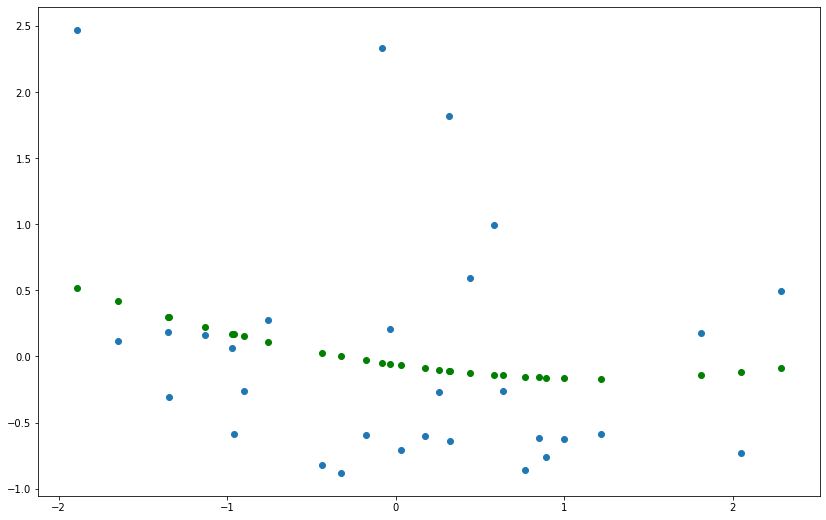

Precisión del modelo:
Precisión del modelo: R =  0.08403266750923621



************************Humedad relativa media************************




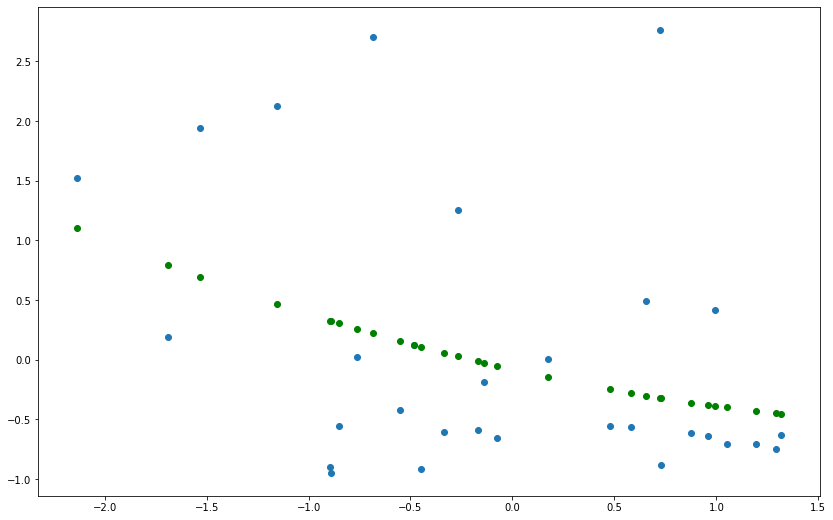

Precisión del modelo:
Precisión del modelo: R =  0.14347811103853325



***********************Humedad relativa máxima************************




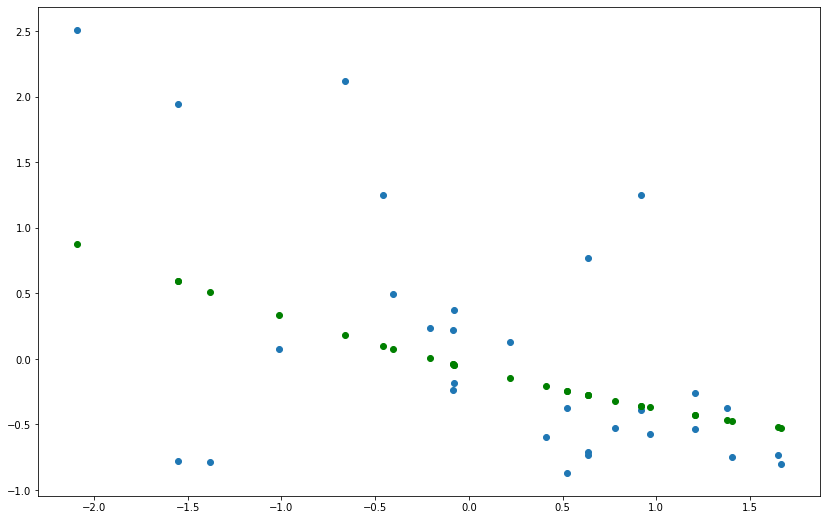

Precisión del modelo:
Precisión del modelo: R =  0.26032269638366423



***********************Humedad relativa mínima************************




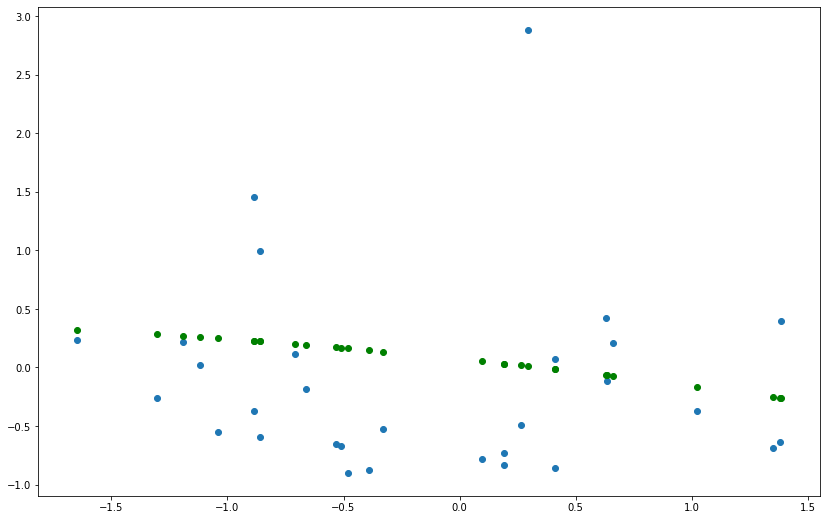

Precisión del modelo:
Precisión del modelo: R =  -0.09681666397561828



**************************Temperatura media***************************




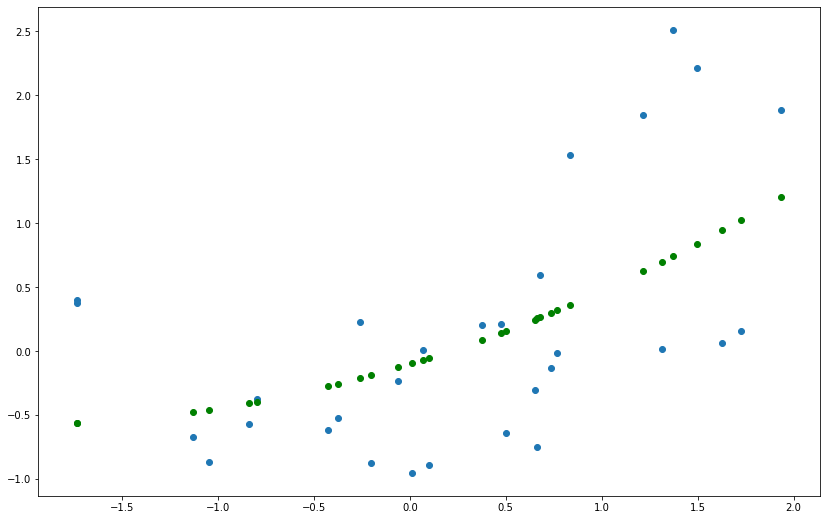

Precisión del modelo:
Precisión del modelo: R =  0.3638543333856531



**************************Temperatura máxima**************************




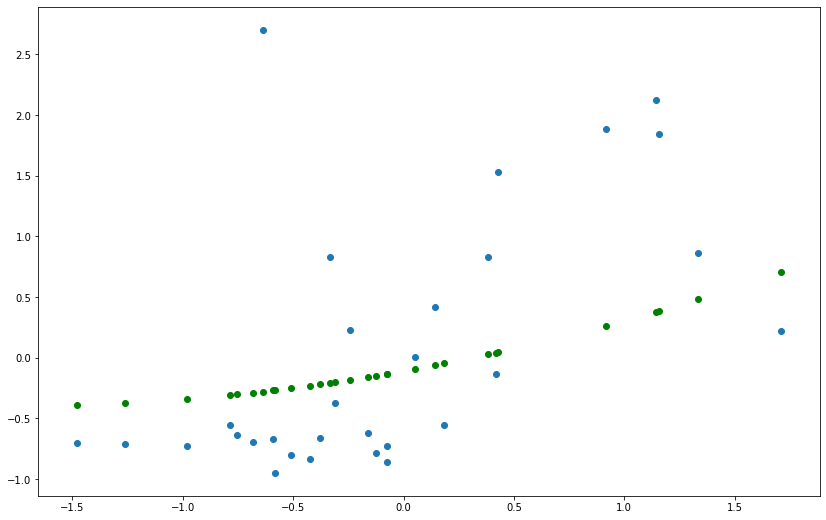

Precisión del modelo:
Precisión del modelo: R =  0.20600822073737446



**************************Temperatura mínima**************************




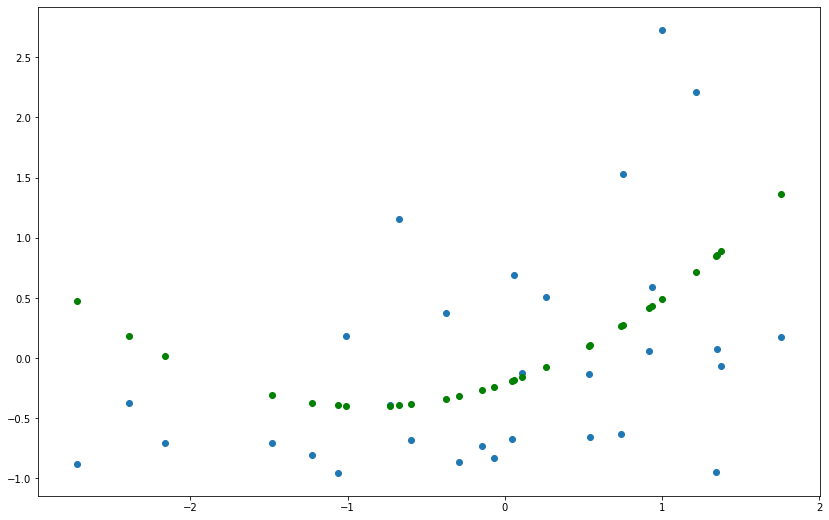

Precisión del modelo:
Precisión del modelo: R =  0.003584074483176991



*************************Temperatura niño 1+2*************************




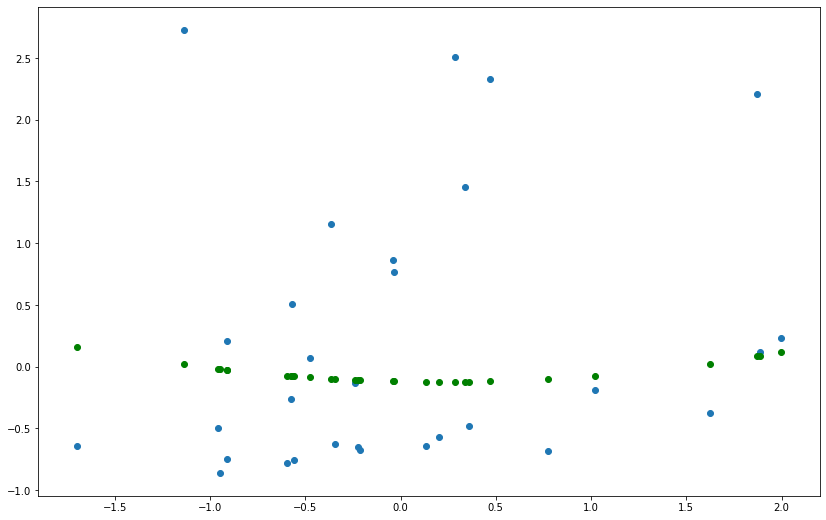

Precisión del modelo:
Precisión del modelo: R =  -0.05448726794950787



**************************Anomalia niño 1+2***************************




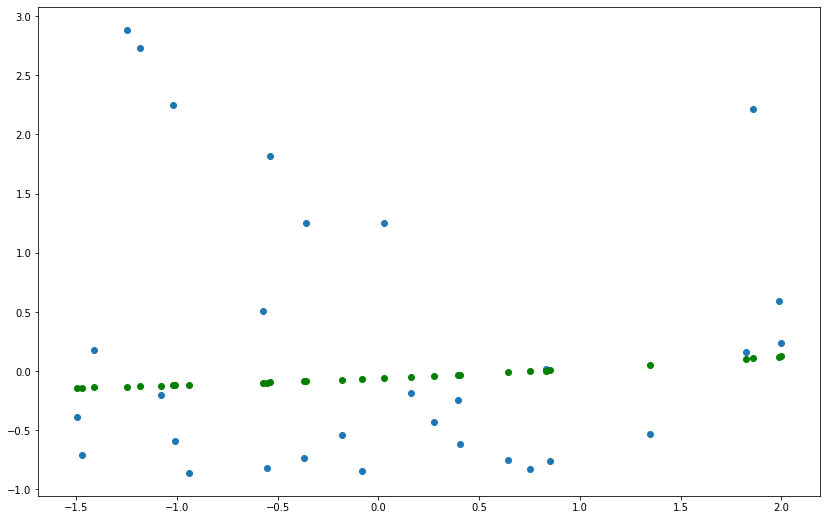

Precisión del modelo:
Precisión del modelo: R =  -0.06203237131665973



**************************Temperatura niño 3**************************




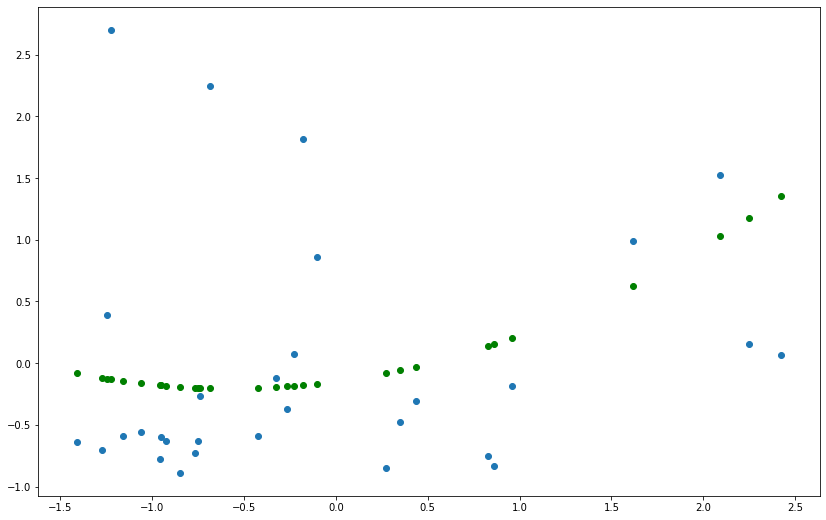

Precisión del modelo:
Precisión del modelo: R =  -0.025473705552937043



***************************Anomalia niño 3****************************




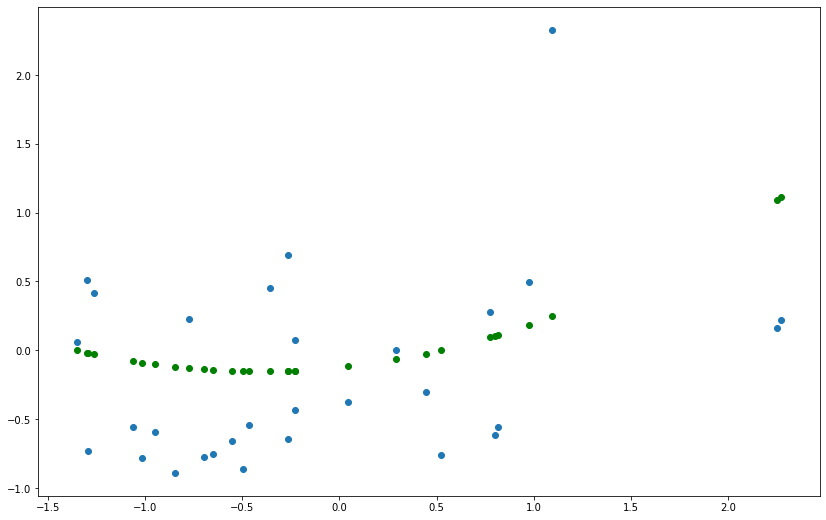

Precisión del modelo:
Precisión del modelo: R =  -0.006235490328622584



**************************Temperatura niño 4**************************




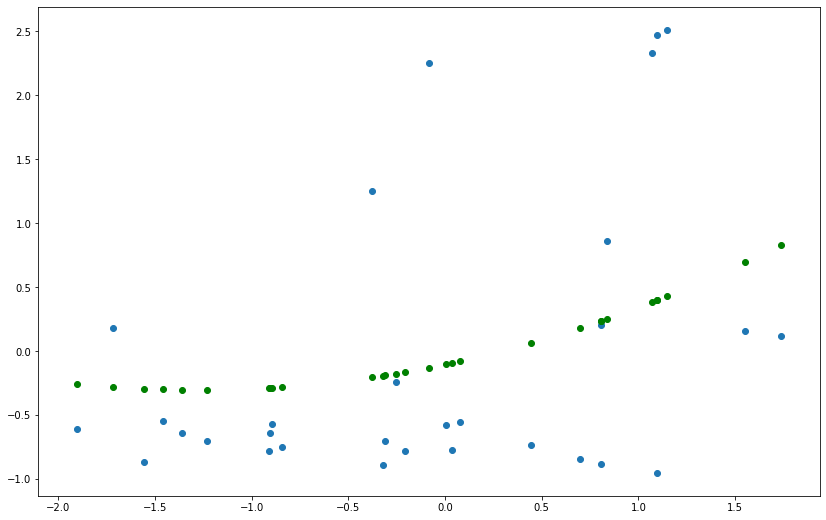

Precisión del modelo:
Precisión del modelo: R =  0.1607659513097518



***************************Anomalia  niño 4***************************




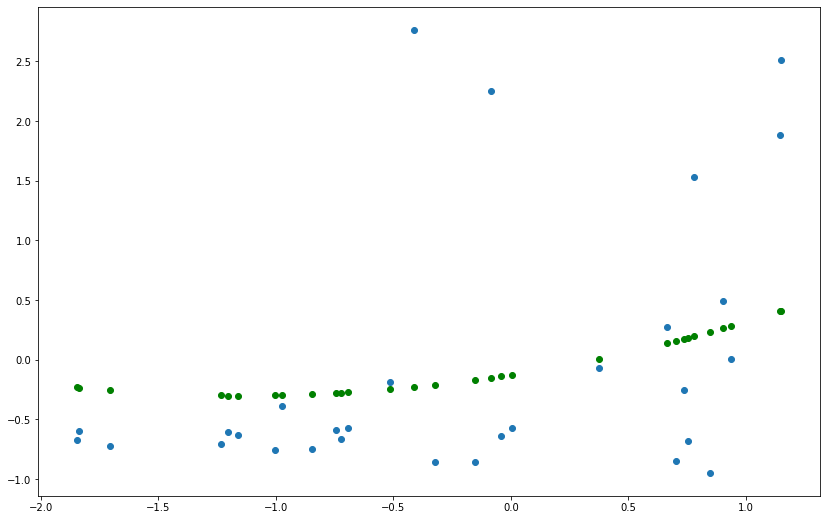

Precisión del modelo:
Precisión del modelo: R =  0.14067824469716783



*************************Temperatura niño 3+4*************************




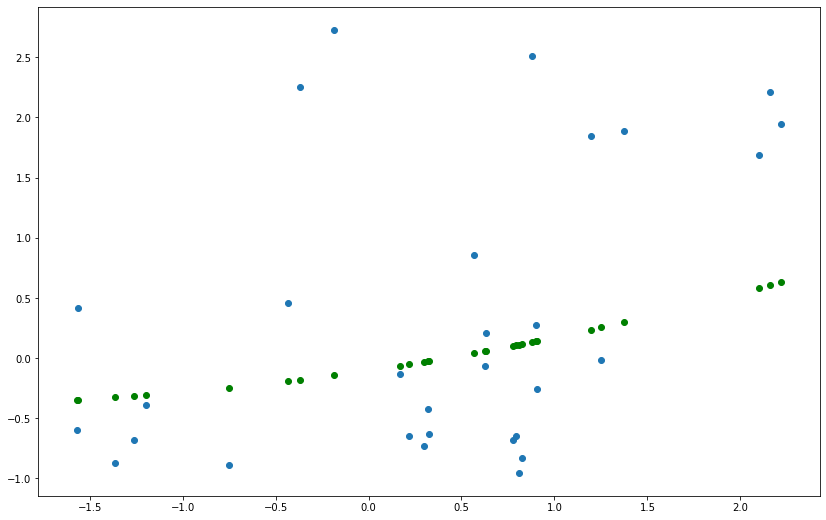

Precisión del modelo:
Precisión del modelo: R =  0.09659519997199029



**************************Anomalia niño 3+4***************************




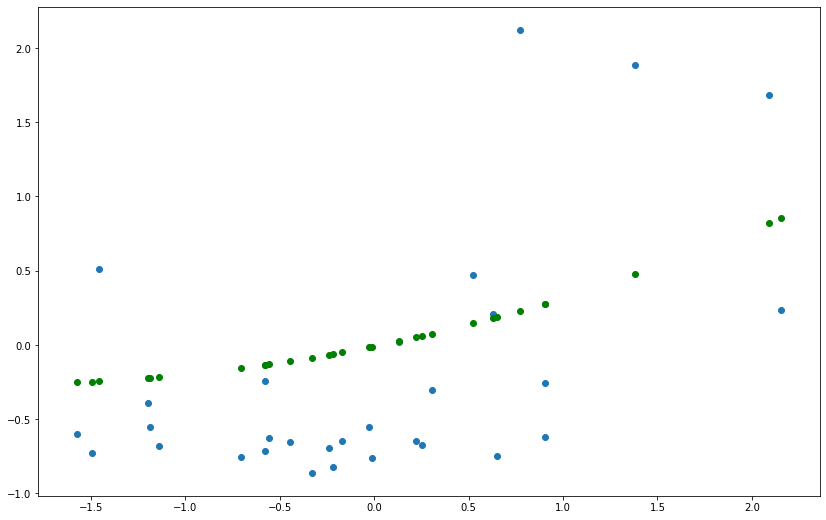

Precisión del modelo:
Precisión del modelo: R =  0.2009648284039237





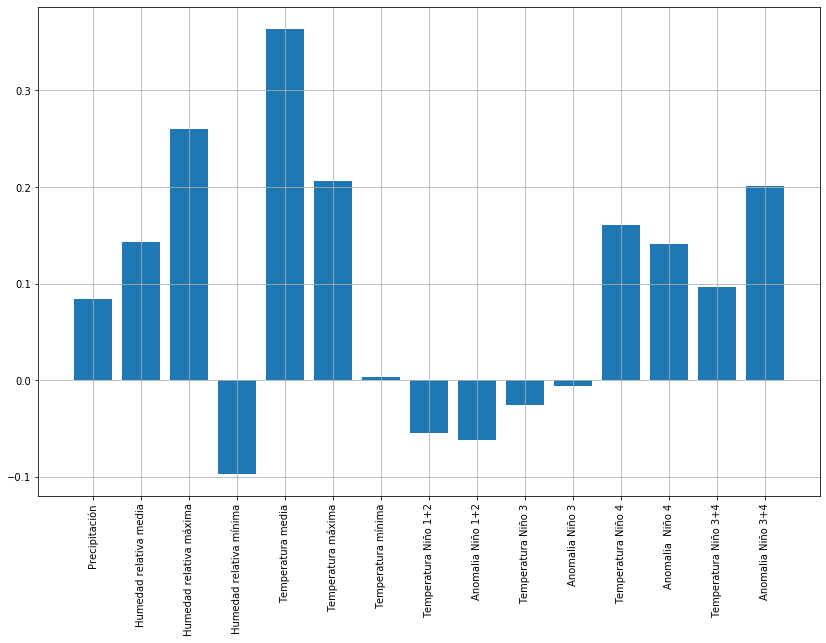

In [10]:
# OK (5)
#Precision en la regresion polinomial simple con datos normalizados
P_R_POLI_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########


    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()
    
    P_R_POLI_S_N[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_N[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


# (6)---- Regresión polinomial simple con datos desnormalizados

=                                    REGRESION POLINOMIAL SIMPLE                                   =
=                                                                                                  =
=                               DATOS MENSUALES DESNORMALIZADOS - CALI                             =




****************************Precipitación*****************************




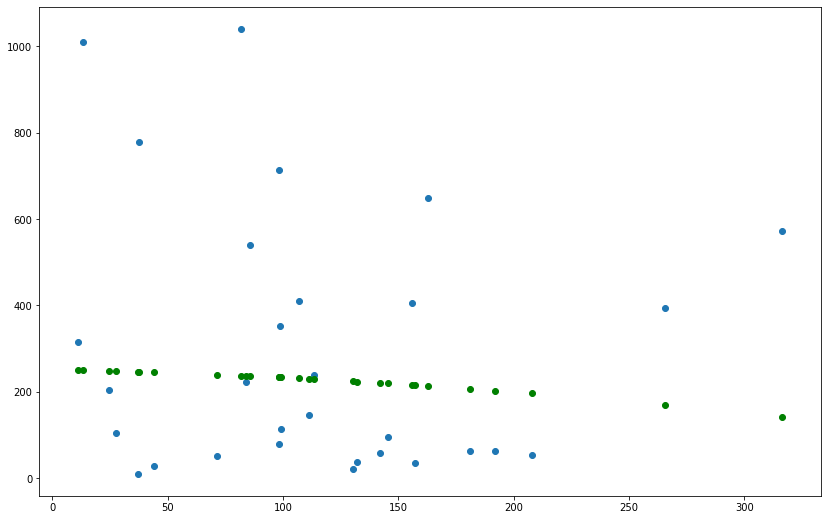

Precisión del modelo:
Precisión del modelo: R =  -0.054600549308082565



************************Humedad relativa media************************




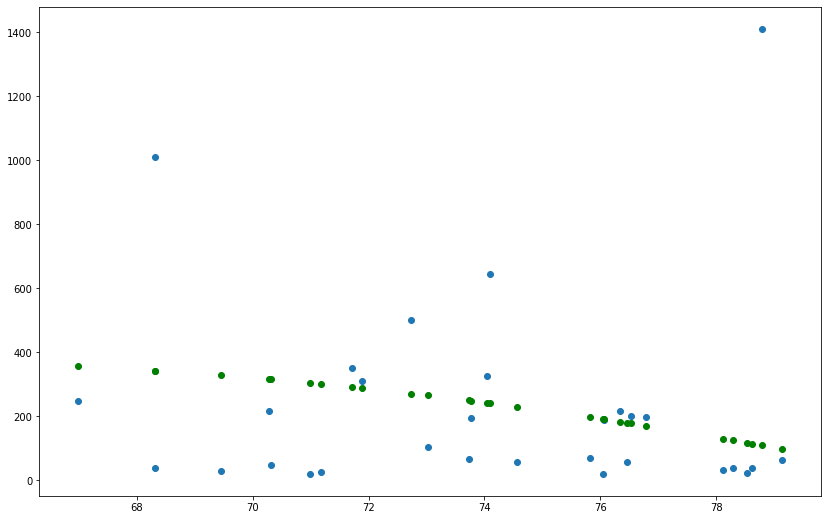

Precisión del modelo:
Precisión del modelo: R =  -0.053450118430834255



***********************Humedad relativa máxima************************




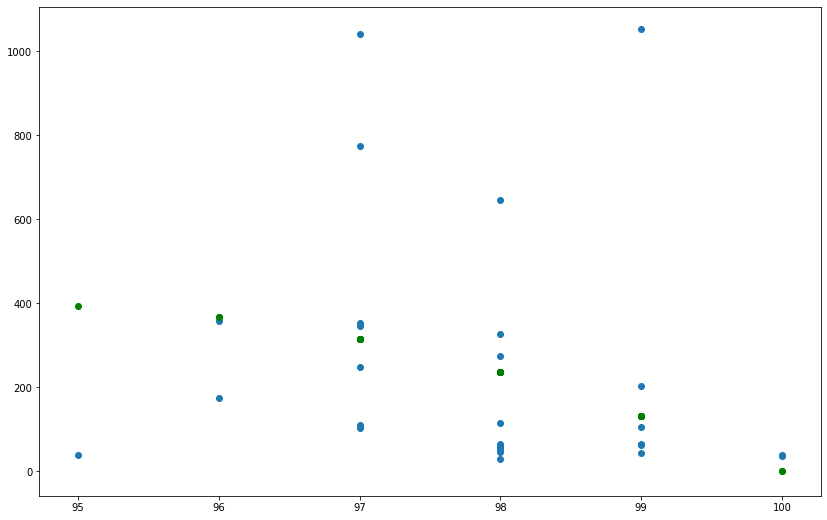

Precisión del modelo:
Precisión del modelo: R =  0.01843903420960291



***********************Humedad relativa mínima************************




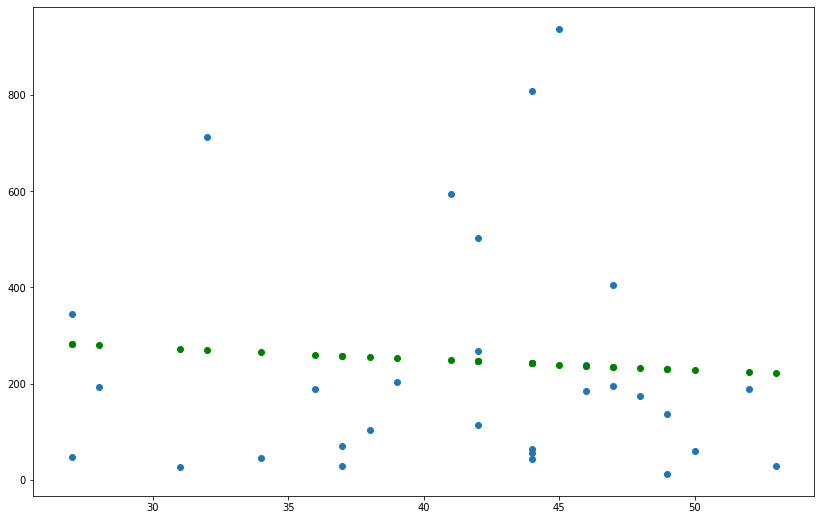

Precisión del modelo:
Precisión del modelo: R =  -0.006712804346455493



**************************Temperatura media***************************




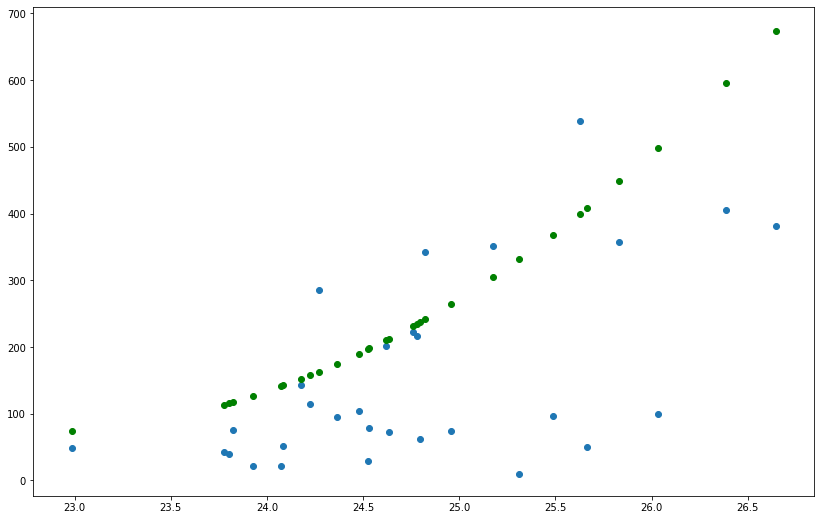

Precisión del modelo:
Precisión del modelo: R =  -0.4260995459582475



**************************Temperatura máxima**************************




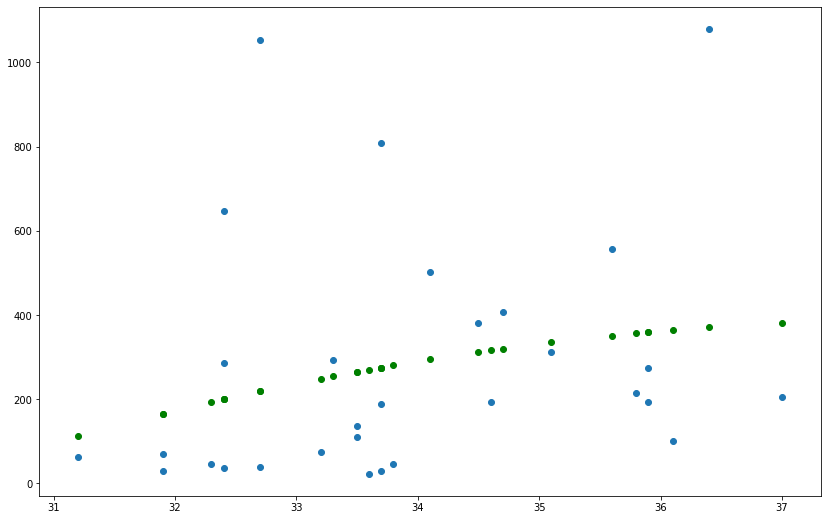

Precisión del modelo:
Precisión del modelo: R =  0.05893290094526659



**************************Temperatura mínima**************************




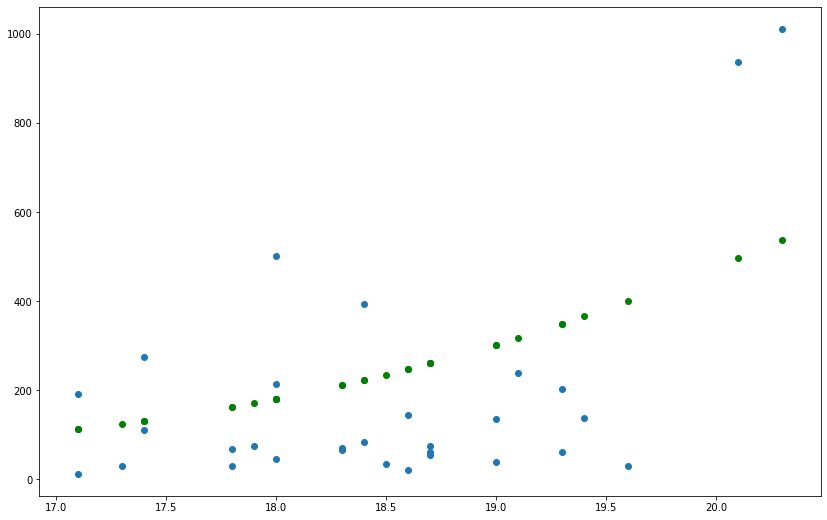

Precisión del modelo:
Precisión del modelo: R =  0.2323664571716968



*************************Temperatura niño 1+2*************************




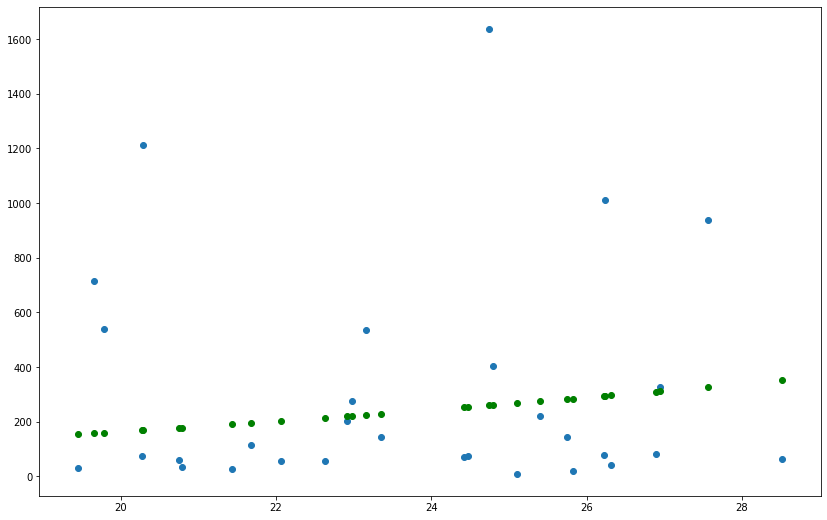

Precisión del modelo:
Precisión del modelo: R =  -0.0427093814910251



**************************Anomalia niño 1+2***************************




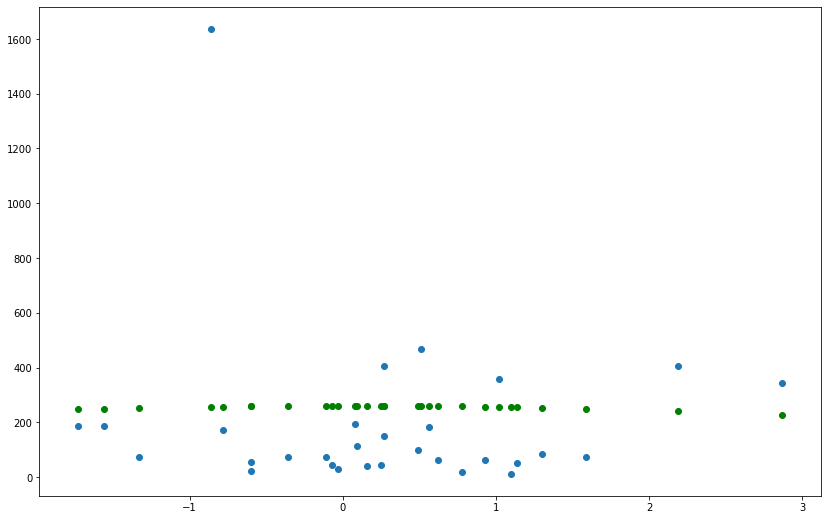

Precisión del modelo:
Precisión del modelo: R =  -0.054609972131036695



**************************Temperatura niño 3**************************




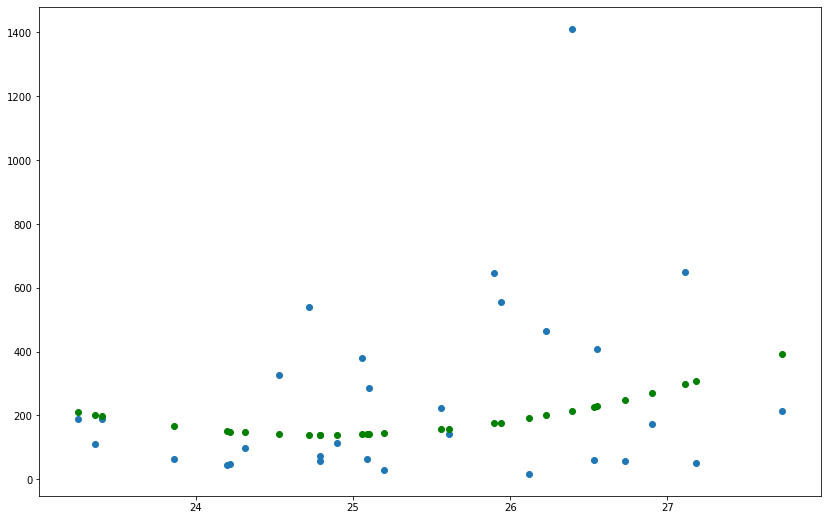

Precisión del modelo:
Precisión del modelo: R =  -0.047237195305397606



***************************Anomalia niño 3****************************




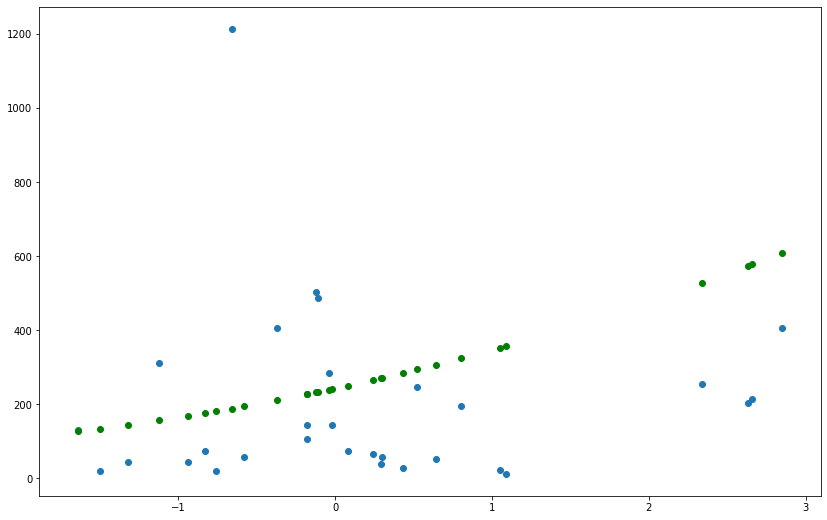

Precisión del modelo:
Precisión del modelo: R =  -0.3764976605690371



**************************Temperatura niño 4**************************




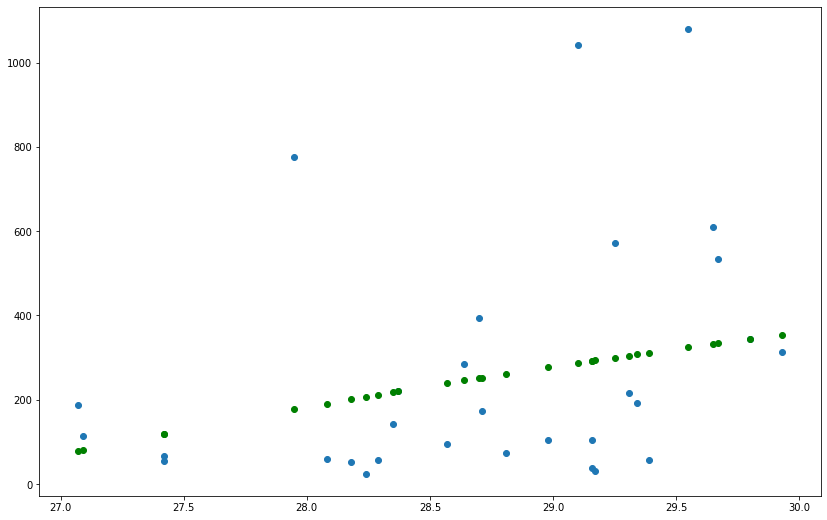

Precisión del modelo:
Precisión del modelo: R =  0.10613260377534983



***************************Anomalia  niño 4***************************




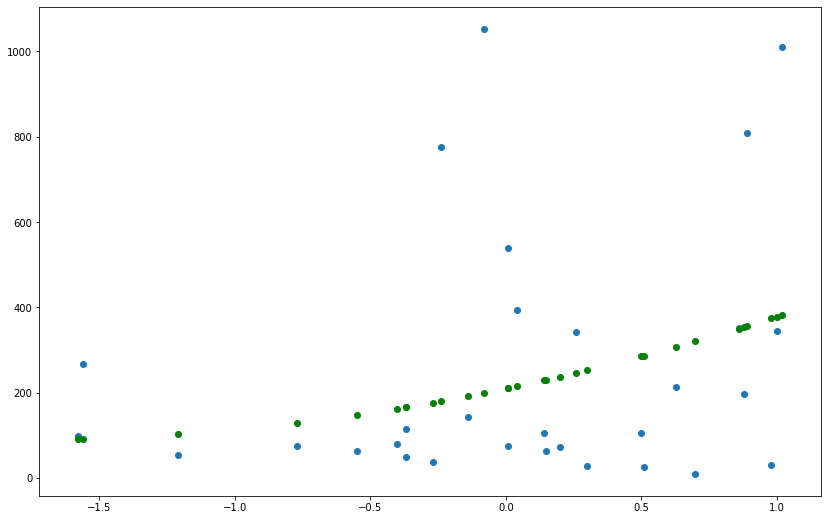

Precisión del modelo:
Precisión del modelo: R =  0.060155514169774604



*************************Temperatura niño 3+4*************************




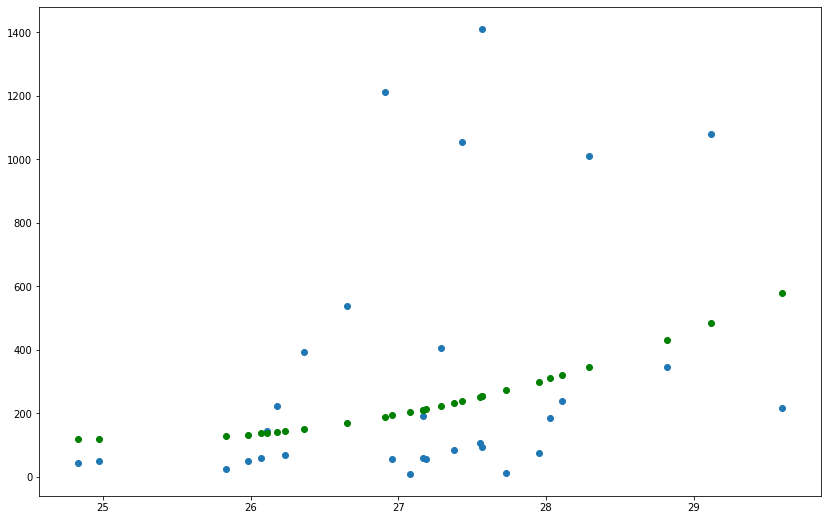

Precisión del modelo:
Precisión del modelo: R =  0.043759452120193276



**************************Anomalia niño 3+4***************************




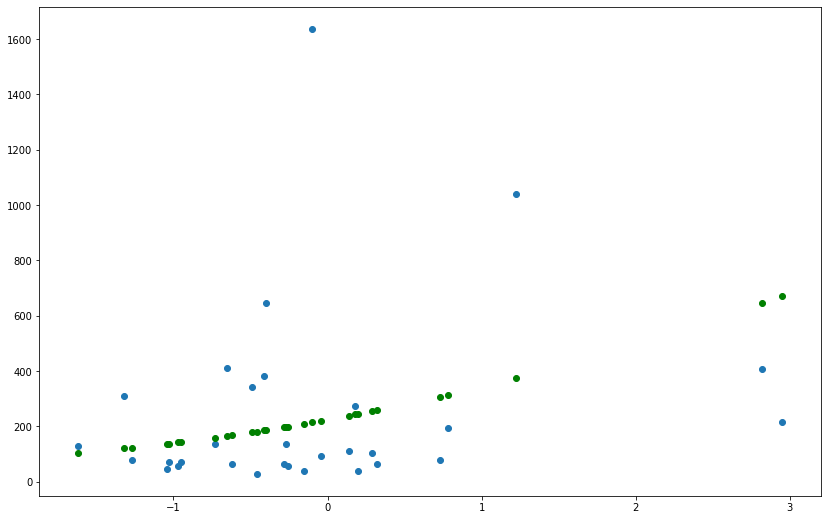

Precisión del modelo:
Precisión del modelo: R =  -0.020090087313569205





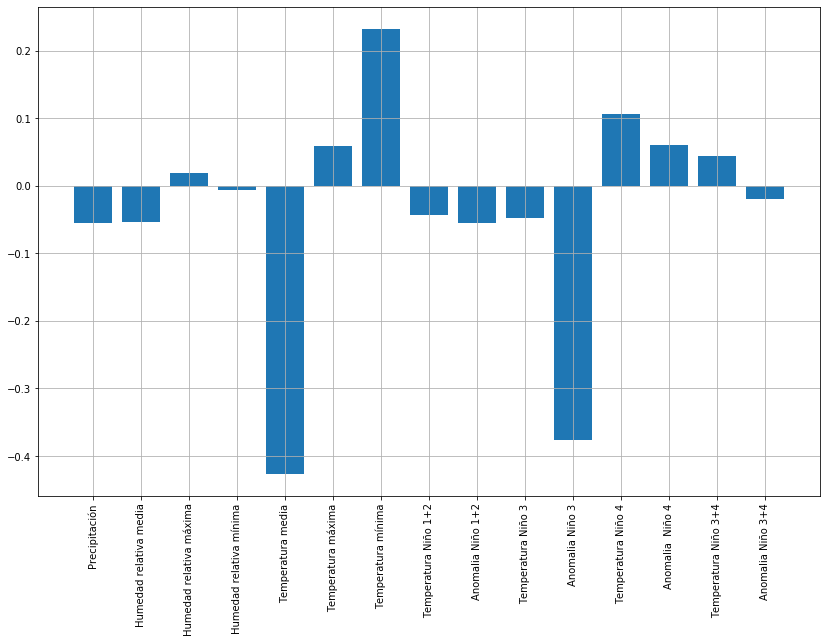

In [11]:
# OK (6)

#Precision en la regresion polinomial simple con datos desnormalizados
P_R_POLI_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                                    REGRESION POLINOMIAL SIMPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                               DATOS MENSUALES DESNORMALIZADOS - CALI                             "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos_dn[0])-2]


#Se define el grado del polinomio 
poli_reg = PolynomialFeatures(degree = 2)


for i in range (2,len(Datos_dn[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    
    
    ########## IMPLEMENTACIÓN DE REGRESIÓN POLINOMIAL ##########


    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Defino el algoritmo a utilizar
    pr = linear_model.LinearRegression()

    #Entreno el modelo
    pr.fit(X_train_poli, y_train)

    #Realizo una predicción
    Y_pred_pr = pr.predict(X_test_poli)
    
    
    #Graficamos los datos junto con el modelo
    plt.scatter(X_test, y_test)
    plt.scatter(X_test, Y_pred_pr, c="g")
    plt.show()

    P_R_POLI_S_DN[i-2]=pr.score(X_test_poli, y_test)

    print('Precisión del modelo:')
    print('Precisión del modelo: R = ',P_R_POLI_S_DN[i-2])
    print('\n\n') 

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure('precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_POLI_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# (7)---- Regresión polinomial Múltiple con datos normalizados (grado 2)¶

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-1.8032118033080917


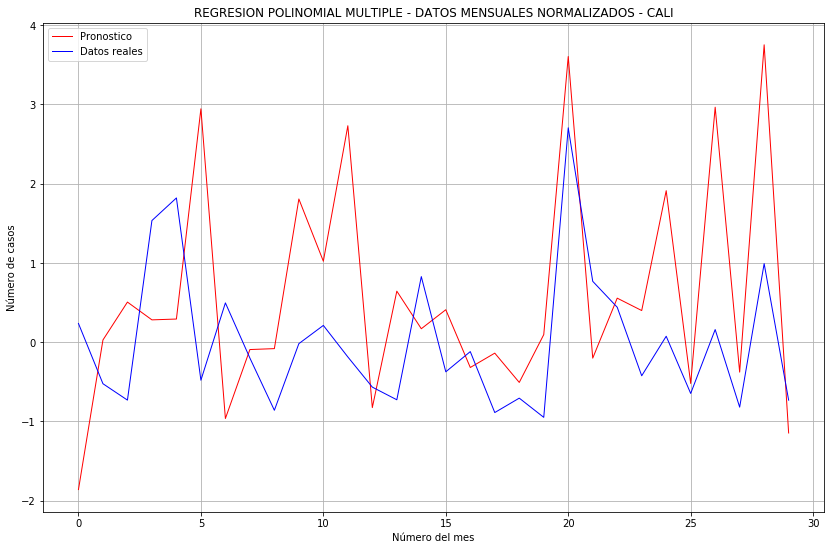

In [12]:
#OK (7)

#Precision en la regresion polinomial multiple con datos normalizados

P_R_POLI_M_N = 0

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos)


#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()

P_R_POLI_M_N = pr.score(X_test_poli, y_test)

print('Precisión del modelo:')
print(P_R_POLI_M_N)



grafico_multiple(Y_pred_pr,'REGRESION POLINOMIAL MULTIPLE - DATOS MENSUALES NORMALIZADOS - CALI')



# (8)---- Regresión polinomial múltiple con datos desnormalizados (grado 2)

=                                  REGRESION POLINOMIAL MULTIPLE                                   =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
-4.279325703738209


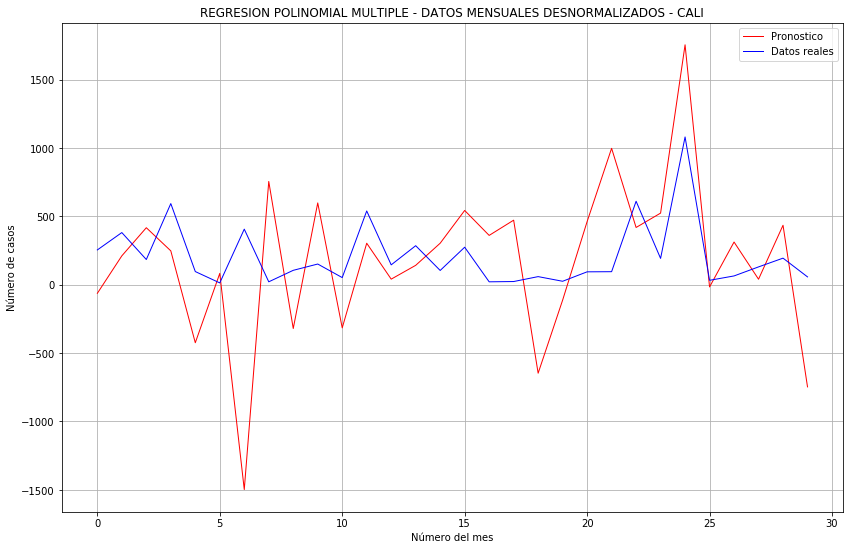

In [13]:
#Precision en la regresion polinomial multiple con datos normalizados

P_R_POLI_M_DN = 0

cadena = ""
print (cadena.center(100, "="))
cadena = "                                  REGRESION POLINOMIAL MULTIPLE                                   "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)


#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos_dn)


#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

#Defino el algoritmo a utilizar
lr_multiple = linear_model.LinearRegression()

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()

P_R_POLI_M_DN = pr.score(X_test_poli, y_test)

print('Precisión del modelo:')
print(P_R_POLI_M_DN)


grafico_multiple(Y_pred_pr,'REGRESION POLINOMIAL MULTIPLE - DATOS MENSUALES DESNORMALIZADOS - CALI')



# (9)-----Regresión SVM con datos normalizados

=                        REGRESION SIMPLE CON MAQUINAS DE SOPORTE VECTORIAL                        =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




****************************Precipitación*****************************




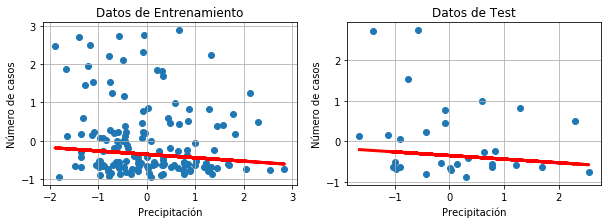

Precisión del modelo: R =  -0.11500599892882701



************************Humedad relativa media************************




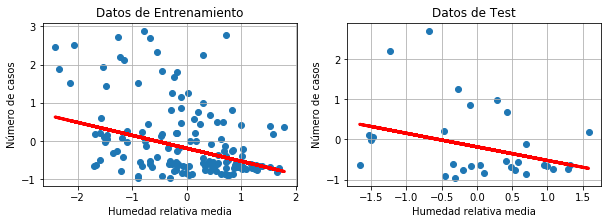

Precisión del modelo: R =  0.10559229991194208



***********************Humedad relativa máxima************************




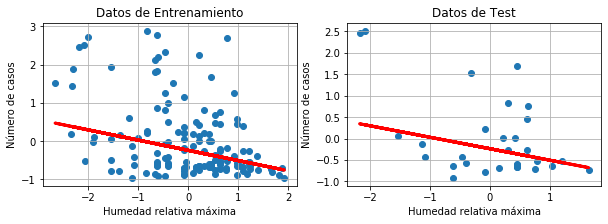

Precisión del modelo: R =  0.12379002251117277



***********************Humedad relativa mínima************************




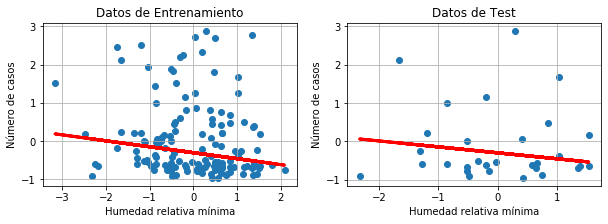

Precisión del modelo: R =  -0.04415146372413581



**************************Temperatura media***************************




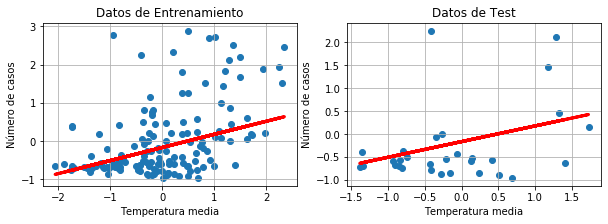

Precisión del modelo: R =  0.13275589045457203



**************************Temperatura máxima**************************




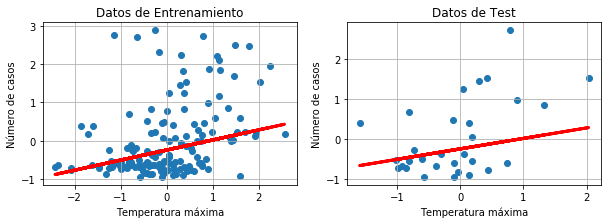

Precisión del modelo: R =  0.07251065848343452



**************************Temperatura mínima**************************




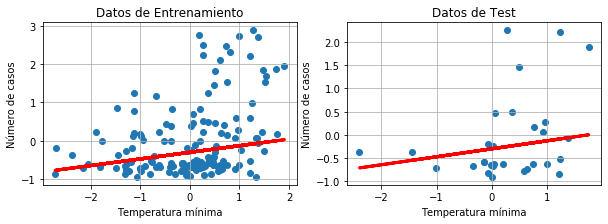

Precisión del modelo: R =  0.051210995316617325



*************************Temperatura niño 1+2*************************




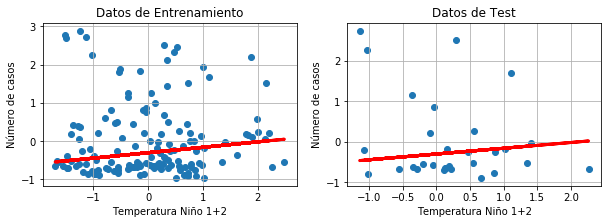

Precisión del modelo: R =  -0.13996627669762662



**************************Anomalia niño 1+2***************************




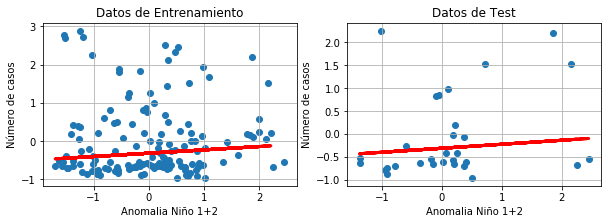

Precisión del modelo: R =  -0.021301982219205318



**************************Temperatura niño 3**************************




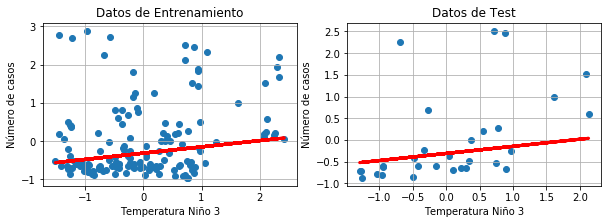

Precisión del modelo: R =  0.047577351168172966



***************************Anomalia niño 3****************************




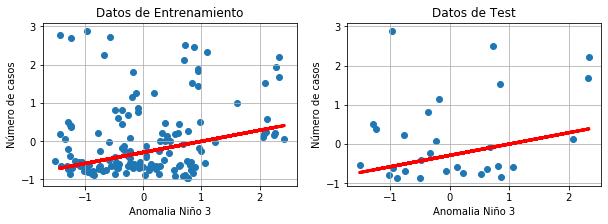

Precisión del modelo: R =  -0.04694279531114698



**************************Temperatura niño 4**************************




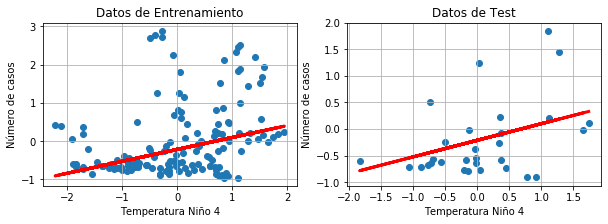

Precisión del modelo: R =  0.16530205475718174



***************************Anomalia  niño 4***************************




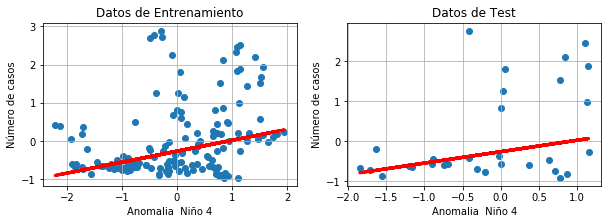

Precisión del modelo: R =  0.019783724893411736



*************************Temperatura niño 3+4*************************




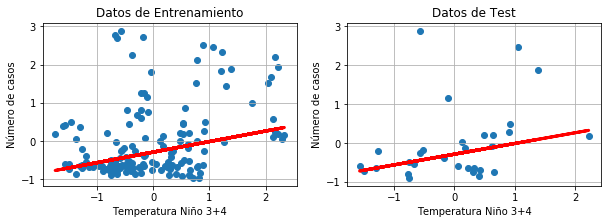

Precisión del modelo: R =  0.0393335220886758



**************************Anomalia niño 3+4***************************




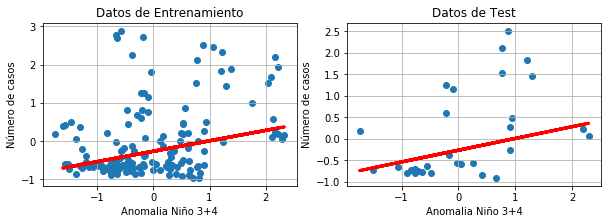

Precisión del modelo: R =  0.08838314208408948





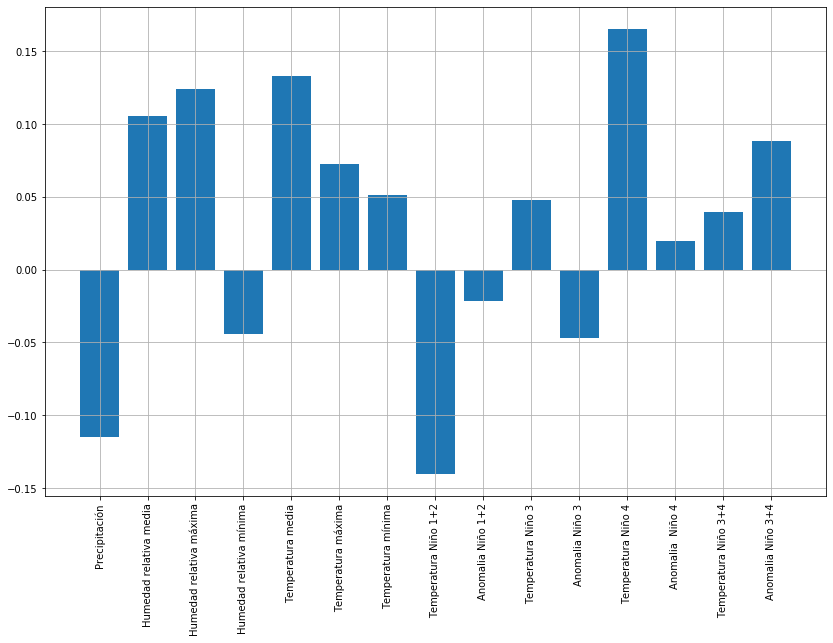

In [14]:
#Precision en la regresion SVR simple con datos normalizados
P_R_SVM_S_N = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                        REGRESION SIMPLE CON MAQUINAS DE SOPORTE VECTORIAL                        "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos[:, len(Datos[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)



for i in range (2,len(Datos[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos[:, i]
    X = np.reshape(X, (L,1))
    


    #Separar los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entrenar el modelo
    svr.fit(X_train, y_train)

    #Realizar una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficar los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Predicción para datos de test
    Y_pred = svr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_N[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_N[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_N
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()


# (10)-----Regresión SVM con datos Desnormalizados

=                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           =
=                                                                                                  =
=                             DATOS MENSUALES DESNORMALIZADOS - CALI                               =




****************************Precipitación*****************************




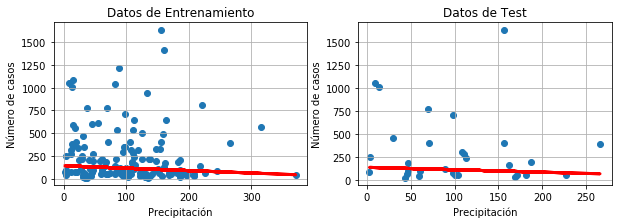

Precisión del modelo: R =  -0.28716879309978793



************************Humedad relativa media************************




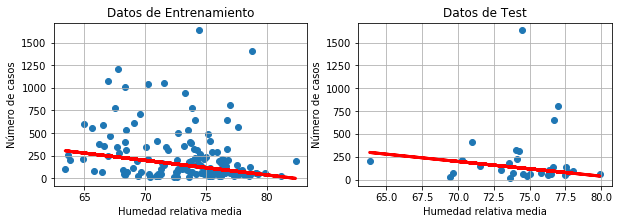

Precisión del modelo: R =  -0.1053671856921532



***********************Humedad relativa máxima************************




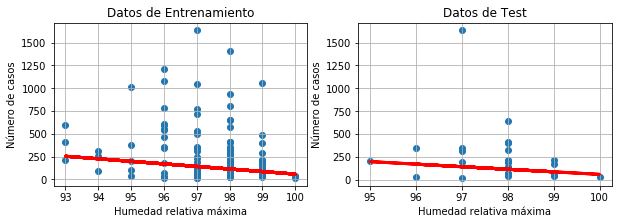

Precisión del modelo: R =  -0.08597568538475642



***********************Humedad relativa mínima************************




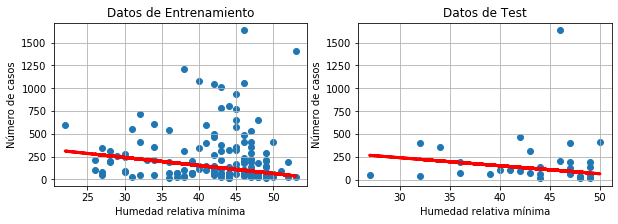

Precisión del modelo: R =  -0.11996645871399837



**************************Temperatura media***************************




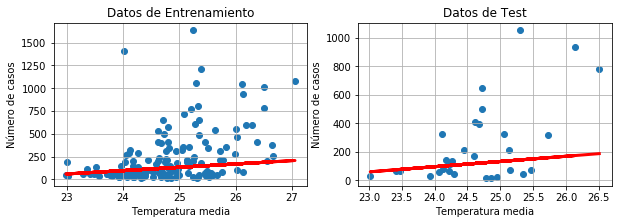

Precisión del modelo: R =  -0.10481981348619862



**************************Temperatura máxima**************************




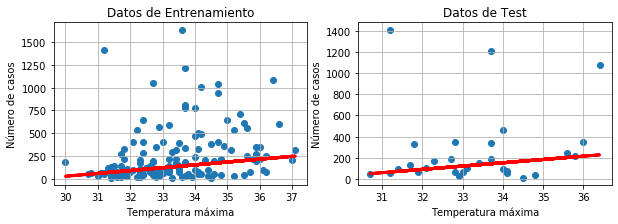

Precisión del modelo: R =  -0.12437783020823877



**************************Temperatura mínima**************************




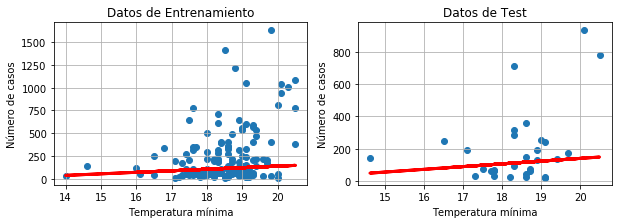

Precisión del modelo: R =  -0.08856330378493915



*************************Temperatura niño 1+2*************************




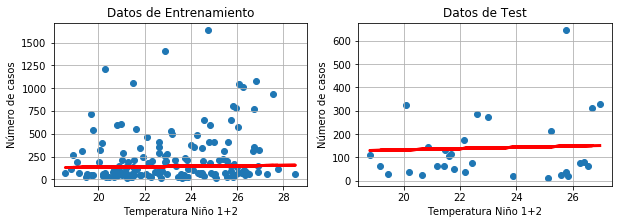

Precisión del modelo: R =  0.014198672680489133



**************************Anomalia niño 1+2***************************




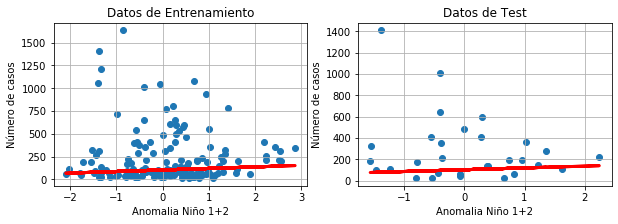

Precisión del modelo: R =  -0.3872022868452003



**************************Temperatura niño 3**************************




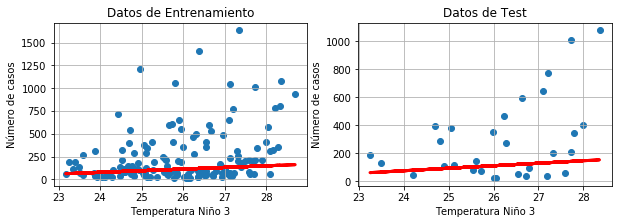

Precisión del modelo: R =  -0.315779248908832



***************************Anomalia niño 3****************************




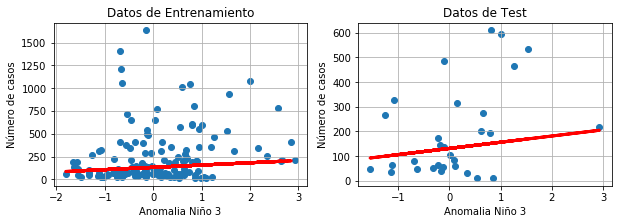

Precisión del modelo: R =  -0.014806476094222809



**************************Temperatura niño 4**************************




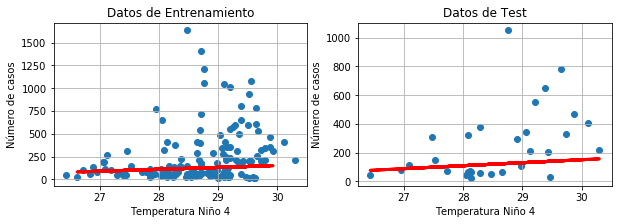

Precisión del modelo: R =  -0.21776088382470982



***************************Anomalia  niño 4***************************




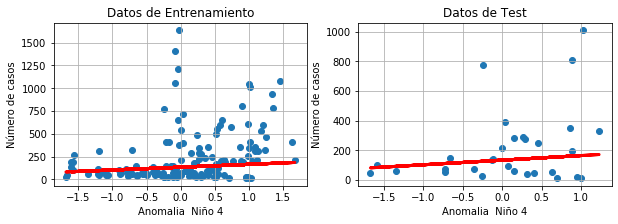

Precisión del modelo: R =  -0.04533907288306516



*************************Temperatura niño 3+4*************************




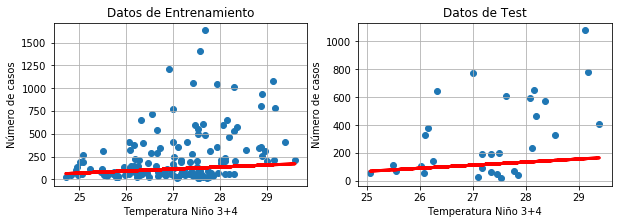

Precisión del modelo: R =  -0.3918017040827122



**************************Anomalia niño 3+4***************************




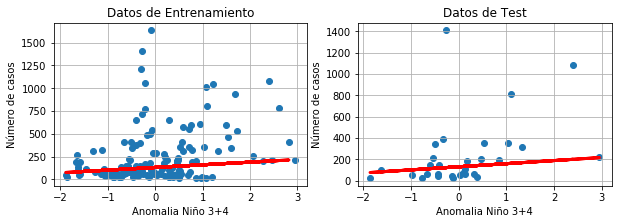

Precisión del modelo: R =  -0.053670386209715426





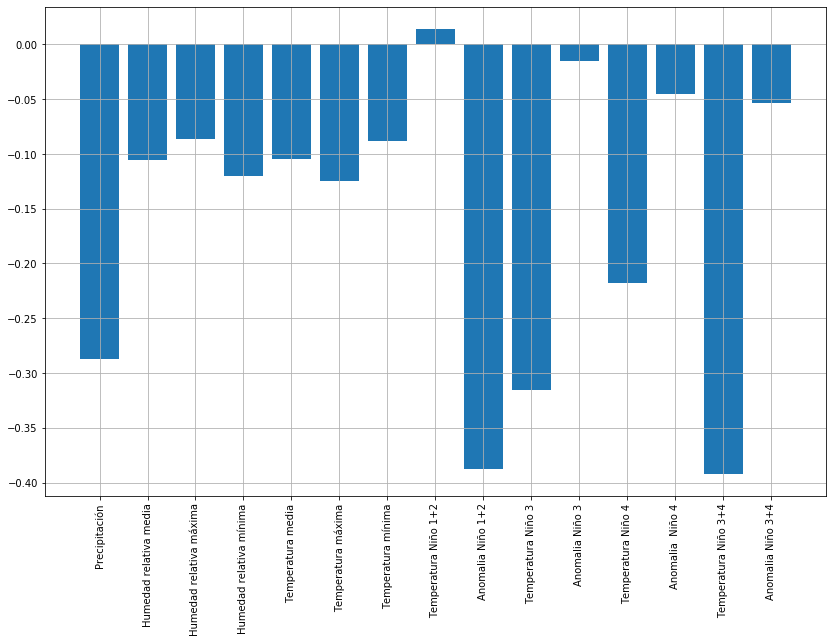

In [15]:
#Precision en la regresion SVM simple con datos desnormalizados
P_R_SVM_S_DN = np.zeros(15)

cadena = ""
print (cadena.center(100, "="))
cadena = "                            REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                           "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                             DATOS MENSUALES DESNORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    

#Seleccionar como variable dependiente el numero de casos
y = Datos_dn[:, len(Datos_dn[0])-2]

#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

for i in range (2,len(Datos_dn[0])-2):
    cadena = Nombres[i].capitalize() 
    print (cadena.center(70, "*")) 
    print ('\n')    

    
    # Capturar y estructurar las variables independientes del modelo
    X = Datos_dn[:, i]
    X = np.reshape(X, (L,1))
    


    #Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    

    #Entreno el modelo
    svr.fit(X_train, y_train)

    #Realizo una predicción
    Y_pred = svr.predict(X_train)
    

    #Graficamos los datos correspondientes
    fig, axes = plt.subplots(1, 2, figsize=(10,3))
    
    # Grafico de datos de entrenamiento y prediccion con esos datos
    axes[0].scatter(X, y)
    axes[0].plot(X_train, Y_pred, color='red', linewidth=3)
    axes[0].grid(True)
    axes[0].set_title('Datos de Entrenamiento')
    axes[0].set_xlabel(Nombres[i])
    axes[0].set_ylabel('Número de casos')

    #Realizo una predicción para datos de test
    Y_pred = svr.predict(X_test)

    
    # Grafico de datos de test y prediccion con esos datos
    axes[1].scatter(X_test, y_test)
    axes[1].plot(X_test, Y_pred, color='red', linewidth=3)
    axes[1].grid(True)
    axes[1].set_title('Datos de Test')
    axes[1].set_xlabel(Nombres[i])
    axes[1].set_ylabel('Número de casos')
    plt.show()
    P_R_SVM_S_DN[i-2]=svr.score(X_test, y_test)
    print('Precisión del modelo: R = ',P_R_SVM_S_DN[i-2])
    print('\n\n')    

    
#Grafico de barras con la presición del modelo para cada variable
fig = plt.figure(u'precisión del modelo para cada variable')
ax = fig.add_subplot(111) # Axes

Variables = Nombres[2:-2]
datos = P_R_SVM_S_DN
xx = range(len(datos))

ax.bar(xx, datos, width=0.8, align='center')
ax.set_xticks(xx)
ax.set_xticklabels(Variables,rotation=90)
ax.grid(True)
plt.show()



# (11)-----Regresión SVM múltiple con datos Normalizados

=                           REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                            =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
0.21554331787775227


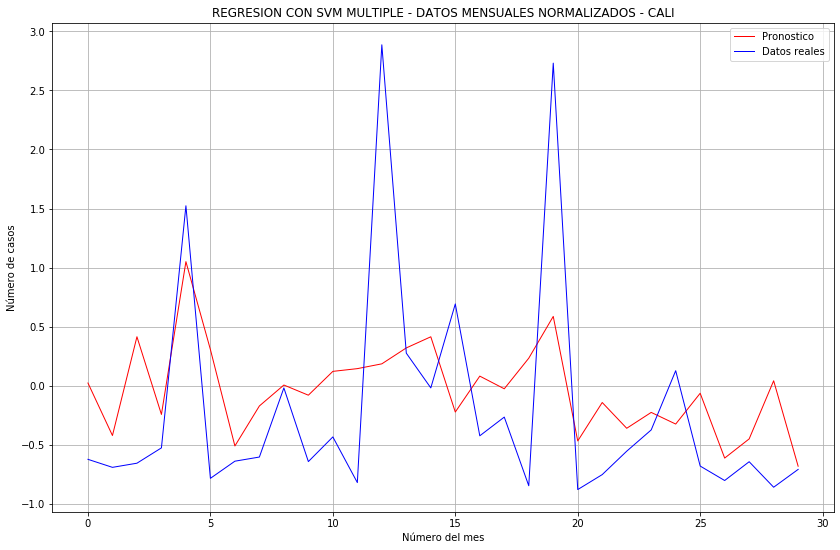

In [16]:
#OK (11) Regresión SVM múltiple con datos Normalizados

#Precision en la regresion polinomial multiple con datos normalizados

P_R_SVM_M_N = 0

cadena = ""
print (cadena.center(100, "="))
cadena = "                           REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                            "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos)



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    


#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

#Entreno el modelo
svr.fit(X_train, y_train)


#Realizo una predicción
Y_pred = svr.predict(X_test)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()

P_R_POLI_M_N = svr.score(X_test, y_test)

print('Precisión del modelo:')
print(P_R_POLI_M_N)



grafico_multiple(Y_pred,'REGRESION CON SVM MULTIPLE - DATOS MENSUALES NORMALIZADOS - CALI')



# (12)-----Regresión SVM múltiple con datos Desnormalizados

=                           REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                            =
=                                                                                                  =
=                                DATOS MENSUALES NORMALIZADOS - CALI                               =




Precisión del modelo:
0.20040968236334536


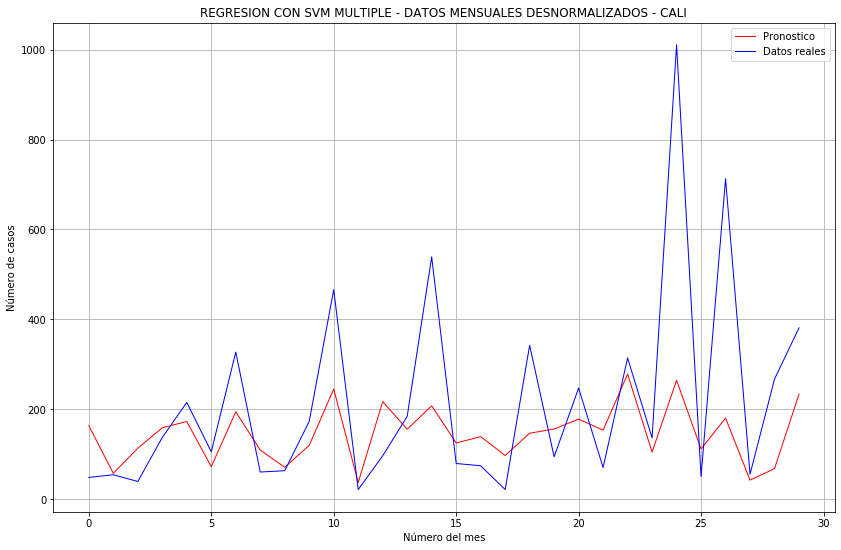

In [17]:
#OK (11) Regresión SVM múltiple con datos Desnormalizados

#Precision en la regresion polinomial multiple con datos normalizados

P_R_SVM_M_N = 0

cadena = ""
print (cadena.center(100, "="))
cadena = "                           REGRESION CON MAQUINAS DE SOPORTE VECTORIAL                            "
print (cadena.center(100, "=")) 
cadena = "                                                                                                  "
print (cadena.center(100, "="))
cadena = "                                DATOS MENSUALES NORMALIZADOS - CALI                               "
print (cadena.center(100, "=")) 
cadena = ""
print (cadena.center(100, "="))
print ('\n\n\n')    


#Generar la matriz de datos para el entrenamiento
X,y = captura(Datos_dn)



#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)    


#Defino el algoritmo a utilizar
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

#Entreno el modelo
svr.fit(X_train, y_train)


#Realizo una predicción
Y_pred = svr.predict(X_test)

#Graficamos los datos junto con el modelo
#plt.scatter(X_test_poli, y_test)
#plt.plot(X_test_poli, Y_pred_pr, color='red', linewidth=3)
#plt.show()

P_R_POLI_M_N = svr.score(X_test, y_test)

print('Precisión del modelo:')
print(P_R_POLI_M_N)


grafico_multiple(Y_pred,'REGRESION CON SVM MULTIPLE - DATOS MENSUALES DESNORMALIZADOS - CALI')

